In [ ]:
# pip install sklearn-evaluation

In [1]:
__title__ = ''
__author__ = 'Claudio Mori'
__credits__ = 'Sayo Makinwa'
__copyright__ = 'Copyright 2020, Thesis Project'

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(font_scale=3)
from IPython.core.pylabtools import figsize
from sklearn_evaluation import plot
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

# importar script creado para reutilizar funciones separe_standarize_data, obtain_metrics, plot_confussion_matrix
from preproc_metrics import *
# importar script para reutilizar función evaluate con el modelo base, de Random Grid Search y Grid search.
# funcion: evaluate(nombre_modelo, modelo_construido, features_prueba, labels_prueba)
from gs_metrics import *

pd.set_option('display.max_columns', None)

In [11]:
# Función para separación de datos y su estandarización con StandardScaler
def separe_standarize_data(X, y):
    # Separación del conjunto de datos en datos de entrenamiento y datos de evaluacion. 30% para datos de evaluación y
    # 70% para datos de entrenamiento
    # X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), test_size = 0.3)
    train_features, test_features, train_labelapp, test_labelapp = \
        train_test_split(X, y.astype(int), test_size=0.3, train_size=0.7, random_state=15)
    '####################################### Estandarizar datos de 11 features ########################################'
    # Crear objeto estandarizador
    sc = StandardScaler()
    # Se va a estandarizar los datos para:
    # Reducir la variabilidad entre las frecuencias de aparición de cada feature que aparece en las aplicaciones
    # Se ajusta los datos de entrenamiento y transforma los datos de entrenamiento.
    train_features = sc.fit_transform(train_features)
    # Se transforman los datos de prueba
    test_features = sc.fit_transform(test_features)
    
    return train_features, test_features, train_labelapp, test_labelapp

In [12]:
# Funcion para calcular metricas
def obtain_metrics(test_labelapp, y_pred):
    '############################################## Calculo de metricas ###############################################'
    # Dibujando la matriz de confusion
    cm = confusion_matrix(test_labelapp, y_pred)
    print('Confusion Matrix', '\n', cm)

    # Calculando la Exactitud (Accuracy)
    accuracy = acc(test_labelapp, y_pred)
    print('Accuracy: ', accuracy, '-->', format(accuracy, ".2%"))

    # Calculando el ratio de error (Error Rate)
    error_rate = 1 - accuracy
    print('Error Rate: ', error_rate, '-->', format(error_rate, '.2%'))

    # Calculando la Precision (Precision)
    precision_score = precision(test_labelapp, y_pred, '.2%')
    print('Precision: ', precision_score, '-->', format(precision_score, ".2%"))

    # Calculando la Sensibilidad (Recall)
    recall_score = recall(test_labelapp, y_pred)
    print('Recall: ', recall_score, '-->', format(recall_score, ".2%"))

    # Calculando el Valor F (F1 Score)
    f1_score = f1(test_labelapp, y_pred)
    print('F1 Score: ', f1_score, '-->', format(f1_score, ".2%"))

    return error_rate, accuracy, precision_score, recall_score, f1_score

In [13]:
# Funcion para dibujar matriz de confusion con heatmap de Seaborn
def plot_confussion_matrix(nombre_modelo, test_labelapp, y_pred):
    # from pandas_ml import ConfusionMatrix
    data = {"y_actual": test_labelapp, "y_predicted": y_pred}
    # print(data)
    df = pd.DataFrame(data, columns=['y_actual', 'y_predicted'])
    confusion_matrix = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'],
                                   margins=False)
    # print(df)
    # print(confusion_matrix)
    # Confusion_Matrix = ConfusionMatrix(df['y_actual'], df['y_predicted'])
    # Confusion_Matrix.print_stats()
    figsize(20, 18)
    sns.set(font_scale=2)
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cbar=True, cmap="YlGnBu", xticklabels=True, yticklabels=True)
    plt.savefig('../code/plots/confussion-matrix-'+nombre_modelo+'.png')
    plt.show()

In [14]:
# Cargando dataset representado por archivo feature_vectors_counts.csv
feature_of_counts = "/home/lechu/Documents/GitHub/Prueba-de-concepto/seleccion_caracteristicas/processed_data" \
                    "/feature_vectors_counts.csv"

# Importando el dataset en forma de archivo .csv.
# Tiene 12 columnas: 11 para mostrar la frecuencia de aparición de los 11 feature extraídos de la aplicacióny 1 para
# la variable target está representada con el label o etiqueta que indica si la aplicación es malware o benigna.
dataset = pd.read_csv(feature_of_counts, index_col=0)

# X: 11 tipos de características (features) 
# permisos solicitaciones, llamadas api restringidas, actividades
# llamadas api sospechosas, permisos usados, servicios
# filtros intent, receptor de mensajes, uses-feature
# urls, proveedor de contenido
X = dataset.iloc[:, 1:12].values
print(X.shape)
print(X,'\n')

# y: etiqueta de la aplicación (0: benigna, 1: malware) (variable target)
y = dataset.iloc[:, 12].values
print(y.shape)
print(y,'\n')



(5598, 11)
[[ 3  0  0 ...  4  3  0]
 [ 3  0  0 ...  2  2  0]
 [ 5  0  0 ... 10  3  0]
 ...
 [13  1  0 ... 14  3  0]
 [25  0  7 ... 16  7  0]
 [ 0  0  0 ...  1  0  0]] 

(5598,)
[ True False  True ...  True False False] 



Text(0.5, 1.0, 'Dataset')

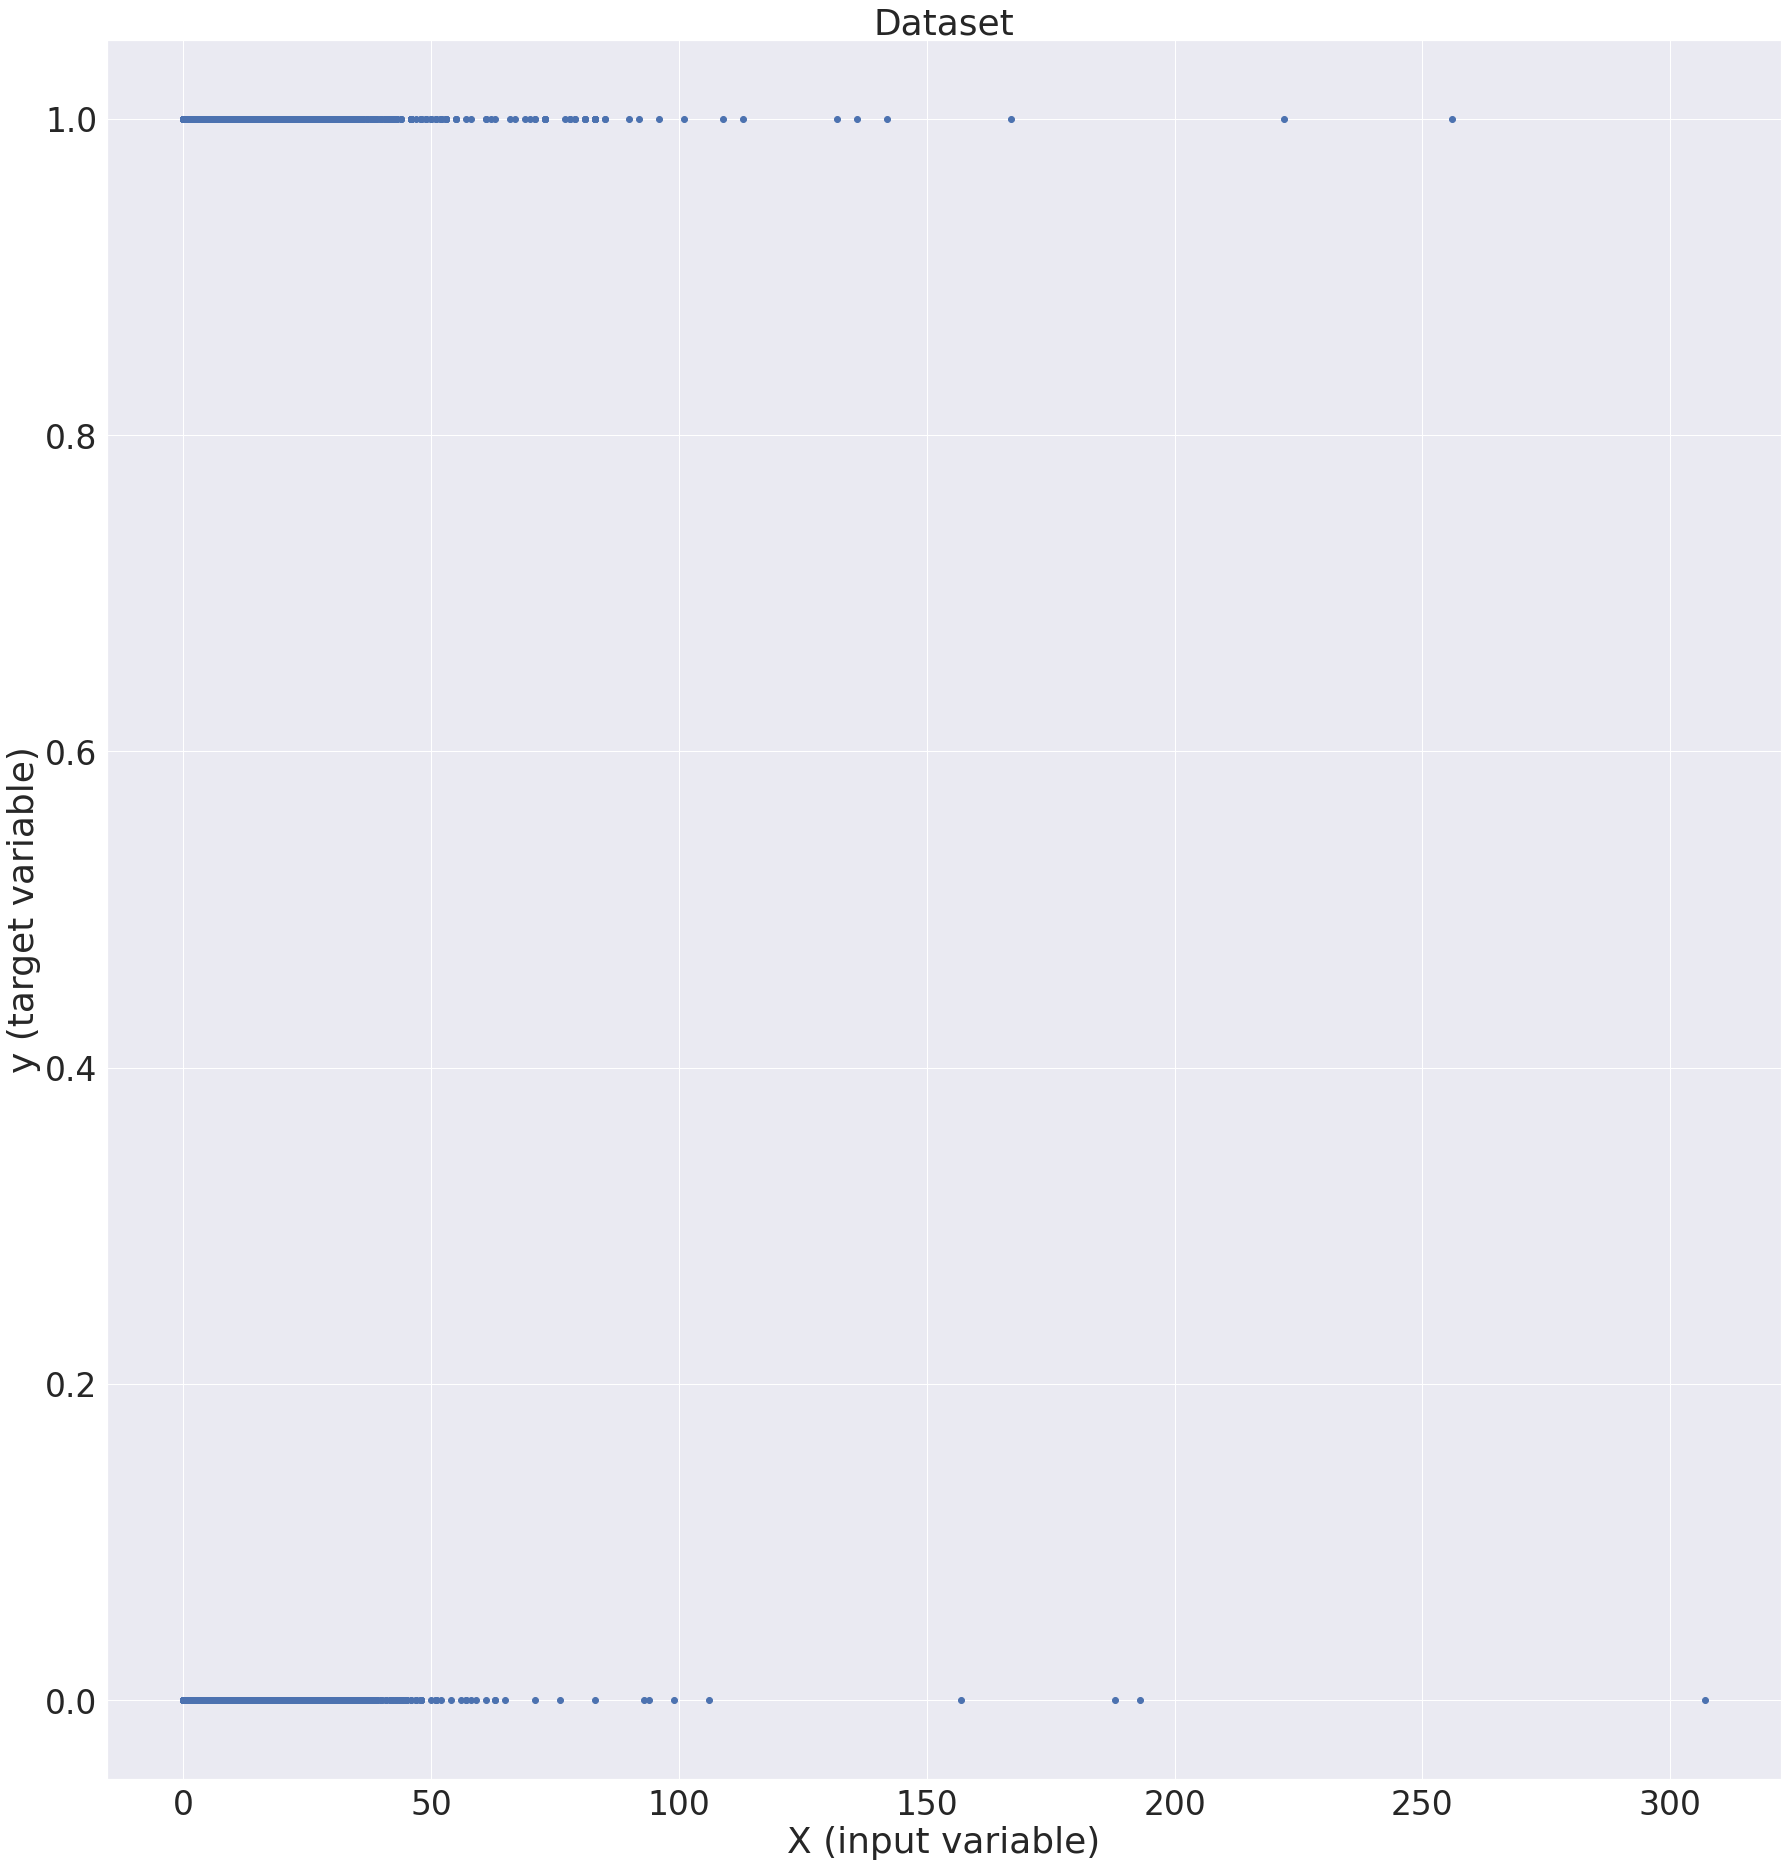

In [15]:
# Grafica de dispersión entre variables de features y label
figsize(30, 32)
plt.plot(X,y,'bo')
plt.xlabel('X (input variable)')
plt.ylabel('y (target variable)')
plt.title("Dataset")

In [16]:
# Separacion de datos y Estandarizacion de los mismos
train_features, test_features, train_labelapp, test_labelapp = separe_standarize_data(X, y)
'###################################### MODELO DE CLASIFICACION: RANDOM FOREST ####################################'
# Random Forest usando 11 features
clf_rfc_11f = RandomForestClassifier(random_state=15)
# Entrenamiento de modelo
clf_rfc_11f.fit(train_features, train_labelapp)
# Obtención de predicciones
y_train_predicted_rfc11f = clf_rfc_11f.predict(train_features)
y_test_predicted_rfc11f = clf_rfc_11f.predict(test_features)



RF with full trees, Train MSE: 0.07784583971413987, Test MSE: 0.1988095238095238


Text(0, 0.5, 'Random Forest prediction')

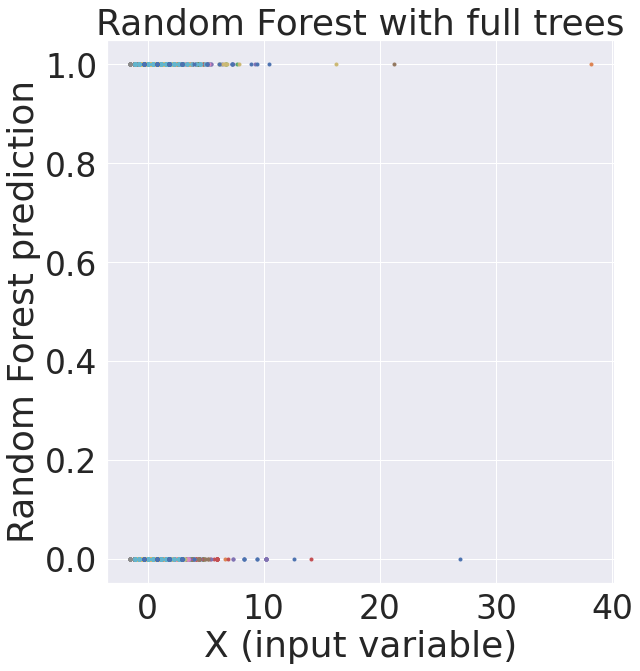

In [17]:
# Calcular Error Cuadrado Medio (Mean Squared Error) para el conjunto de entrenamiento y de prueba de la variable target
mse_train = mean_squared_error(train_labelapp, y_train_predicted_rfc11f)
mse_test = mean_squared_error(test_labelapp, y_test_predicted_rfc11f)
print("RF with full trees, Train MSE: {}, Test MSE: {}".format(mse_train, mse_test))

# Dibujar dispersión de datos de datos de prueba de features y predicciones obtenidas
plt.figure(figsize=(20,10))
plt.subplot(121)
# plt.plot(test_features[:,0], y_test_predicted,'.')
plt.plot(test_features, y_test_predicted_rfc11f,'.')
plt.title("Random Forest with full trees")
plt.xlabel("X (input variable)")
plt.ylabel("Random Forest prediction")


In [18]:
'################################### MODELO DE CLASIFICACION: SOPORTE VECTORIAL ###################################'
# Soporte Vectorial usando 11 features
clf_svc_11f = SVC(random_state=15)
# Entrenamiento del modelo
clf_svc_11f.fit(train_features, train_labelapp)
# Obtención de predicciones
y_train_pred_svc11f = clf_svc_11f.predict(train_features)
y_test_pred_svc11f = clf_svc_11f.predict(test_features)

################################### Resultados de los modelos usando 11 features ##################################
######################################## Métricas de Random Forest ########################################
Confusion Matrix 
 [[591 194]
 [140 755]]
Accuracy:  0.8011904761904762 --> 80.12%
Error Rate:  0.19880952380952377 --> 19.88%
Precision:  0.7955742887249737 --> 79.56%
Recall:  0.8435754189944135 --> 84.36%
F1 Score:  0.8188720173535792 --> 81.89%
###################################### Métricas de Soporte Vectorial ######################################
Confusion Matrix 
 [[553 232]
 [211 684]]
Accuracy:  0.7363095238095239 --> 73.63%
Error Rate:  0.26369047619047614 --> 26.37%
Precision:  0.7467248908296943 --> 74.67%
Recall:  0.7642458100558659 --> 76.42%
F1 Score:  0.7553837658752071 --> 75.54%


/home/lechu/Documents/GitHub/Prueba-de-concepto/entorno_virtual _(venv)/venv-3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=.2% as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


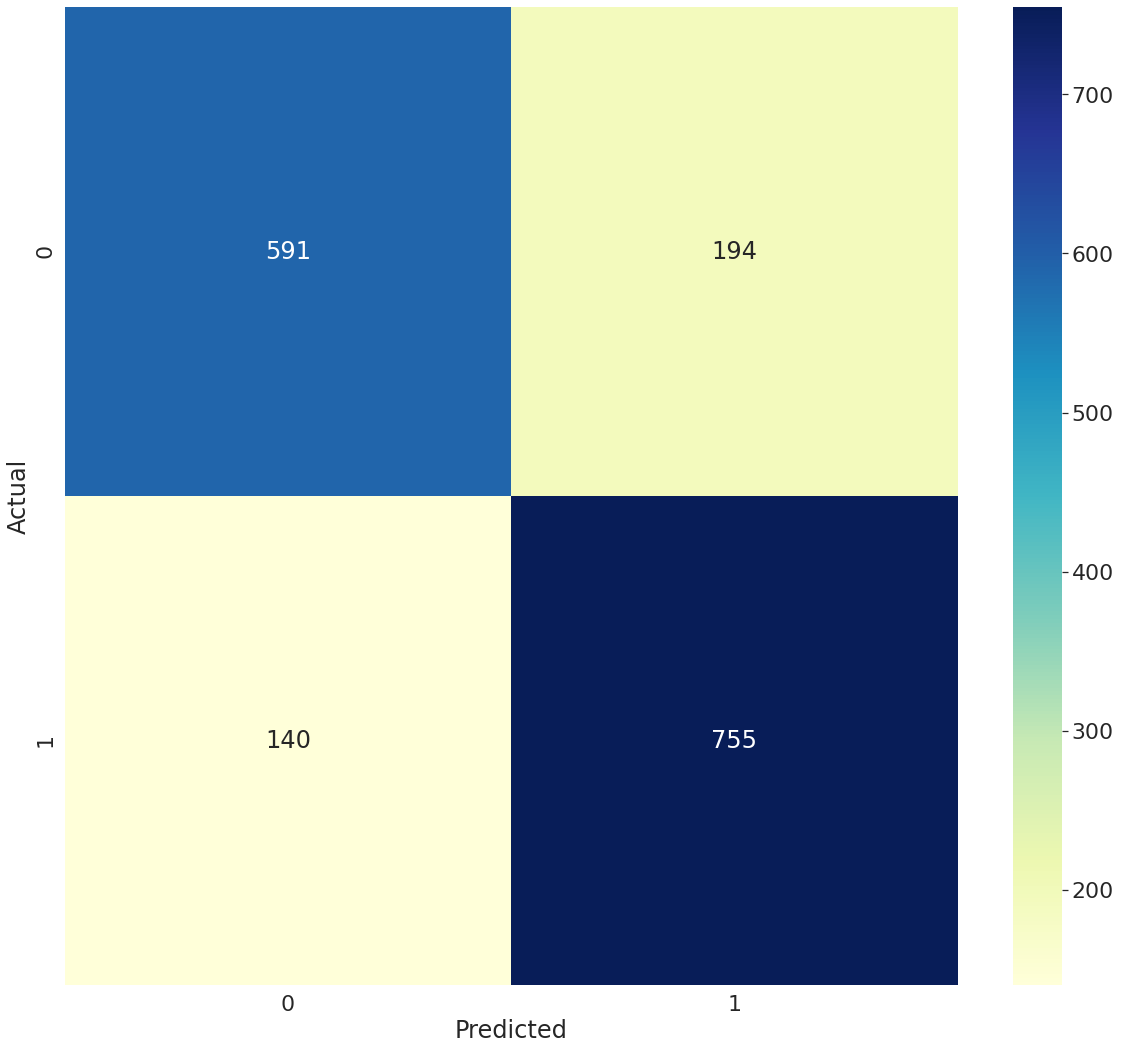

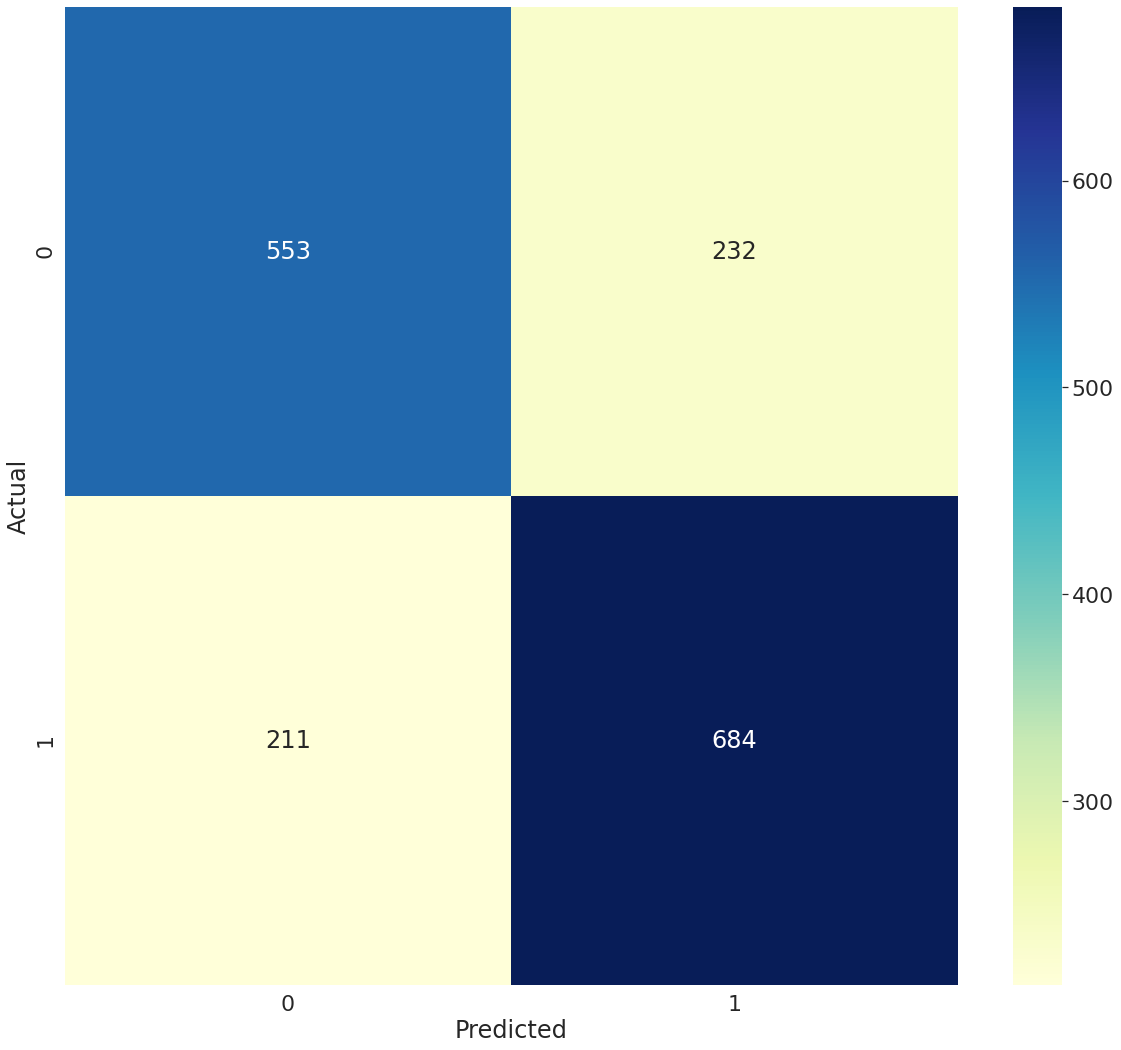

In [19]:
print('################################### Resultados de los modelos usando 11 features ##################################')
print('######################################## Métricas de Random Forest ########################################')
error_rate_rfc11f, accuracy_rfc11f, precision_rfc11f, recall_rfc11f, f1_rfc11f = obtain_metrics(test_labelapp, y_test_predicted_rfc11f)
plot_confussion_matrix('rfc-11features', test_labelapp, y_test_predicted_rfc11f)
print('###################################### Métricas de Soporte Vectorial ######################################')
error_rate_svc11f, accuracy_svc11f, precision_svc11f, recall_svc11f, f1_svc11f = obtain_metrics(test_labelapp, y_test_pred_svc11f)
plot_confussion_matrix('svc_11features', test_labelapp, y_test_pred_svc11f)


########################## MODELO DE CLASIFICACION USANDO FEATURES SELECCIONADOS ###########################
############################# Encontrando features importantes con Scikit-learn ############################
permisos_solicitados    0.199433
api_restringidas        0.151802
actividades             0.144581
api_sospechosas         0.137180
permisos_usados         0.107889
servicios               0.077485
filtros_intent          0.065365
receptor_mensajes       0.047462
urls                    0.025830
uses-feature            0.025400
proveedor_contenido     0.017572
dtype: float64
################################## Grafico de barras con importantacia features ##################################


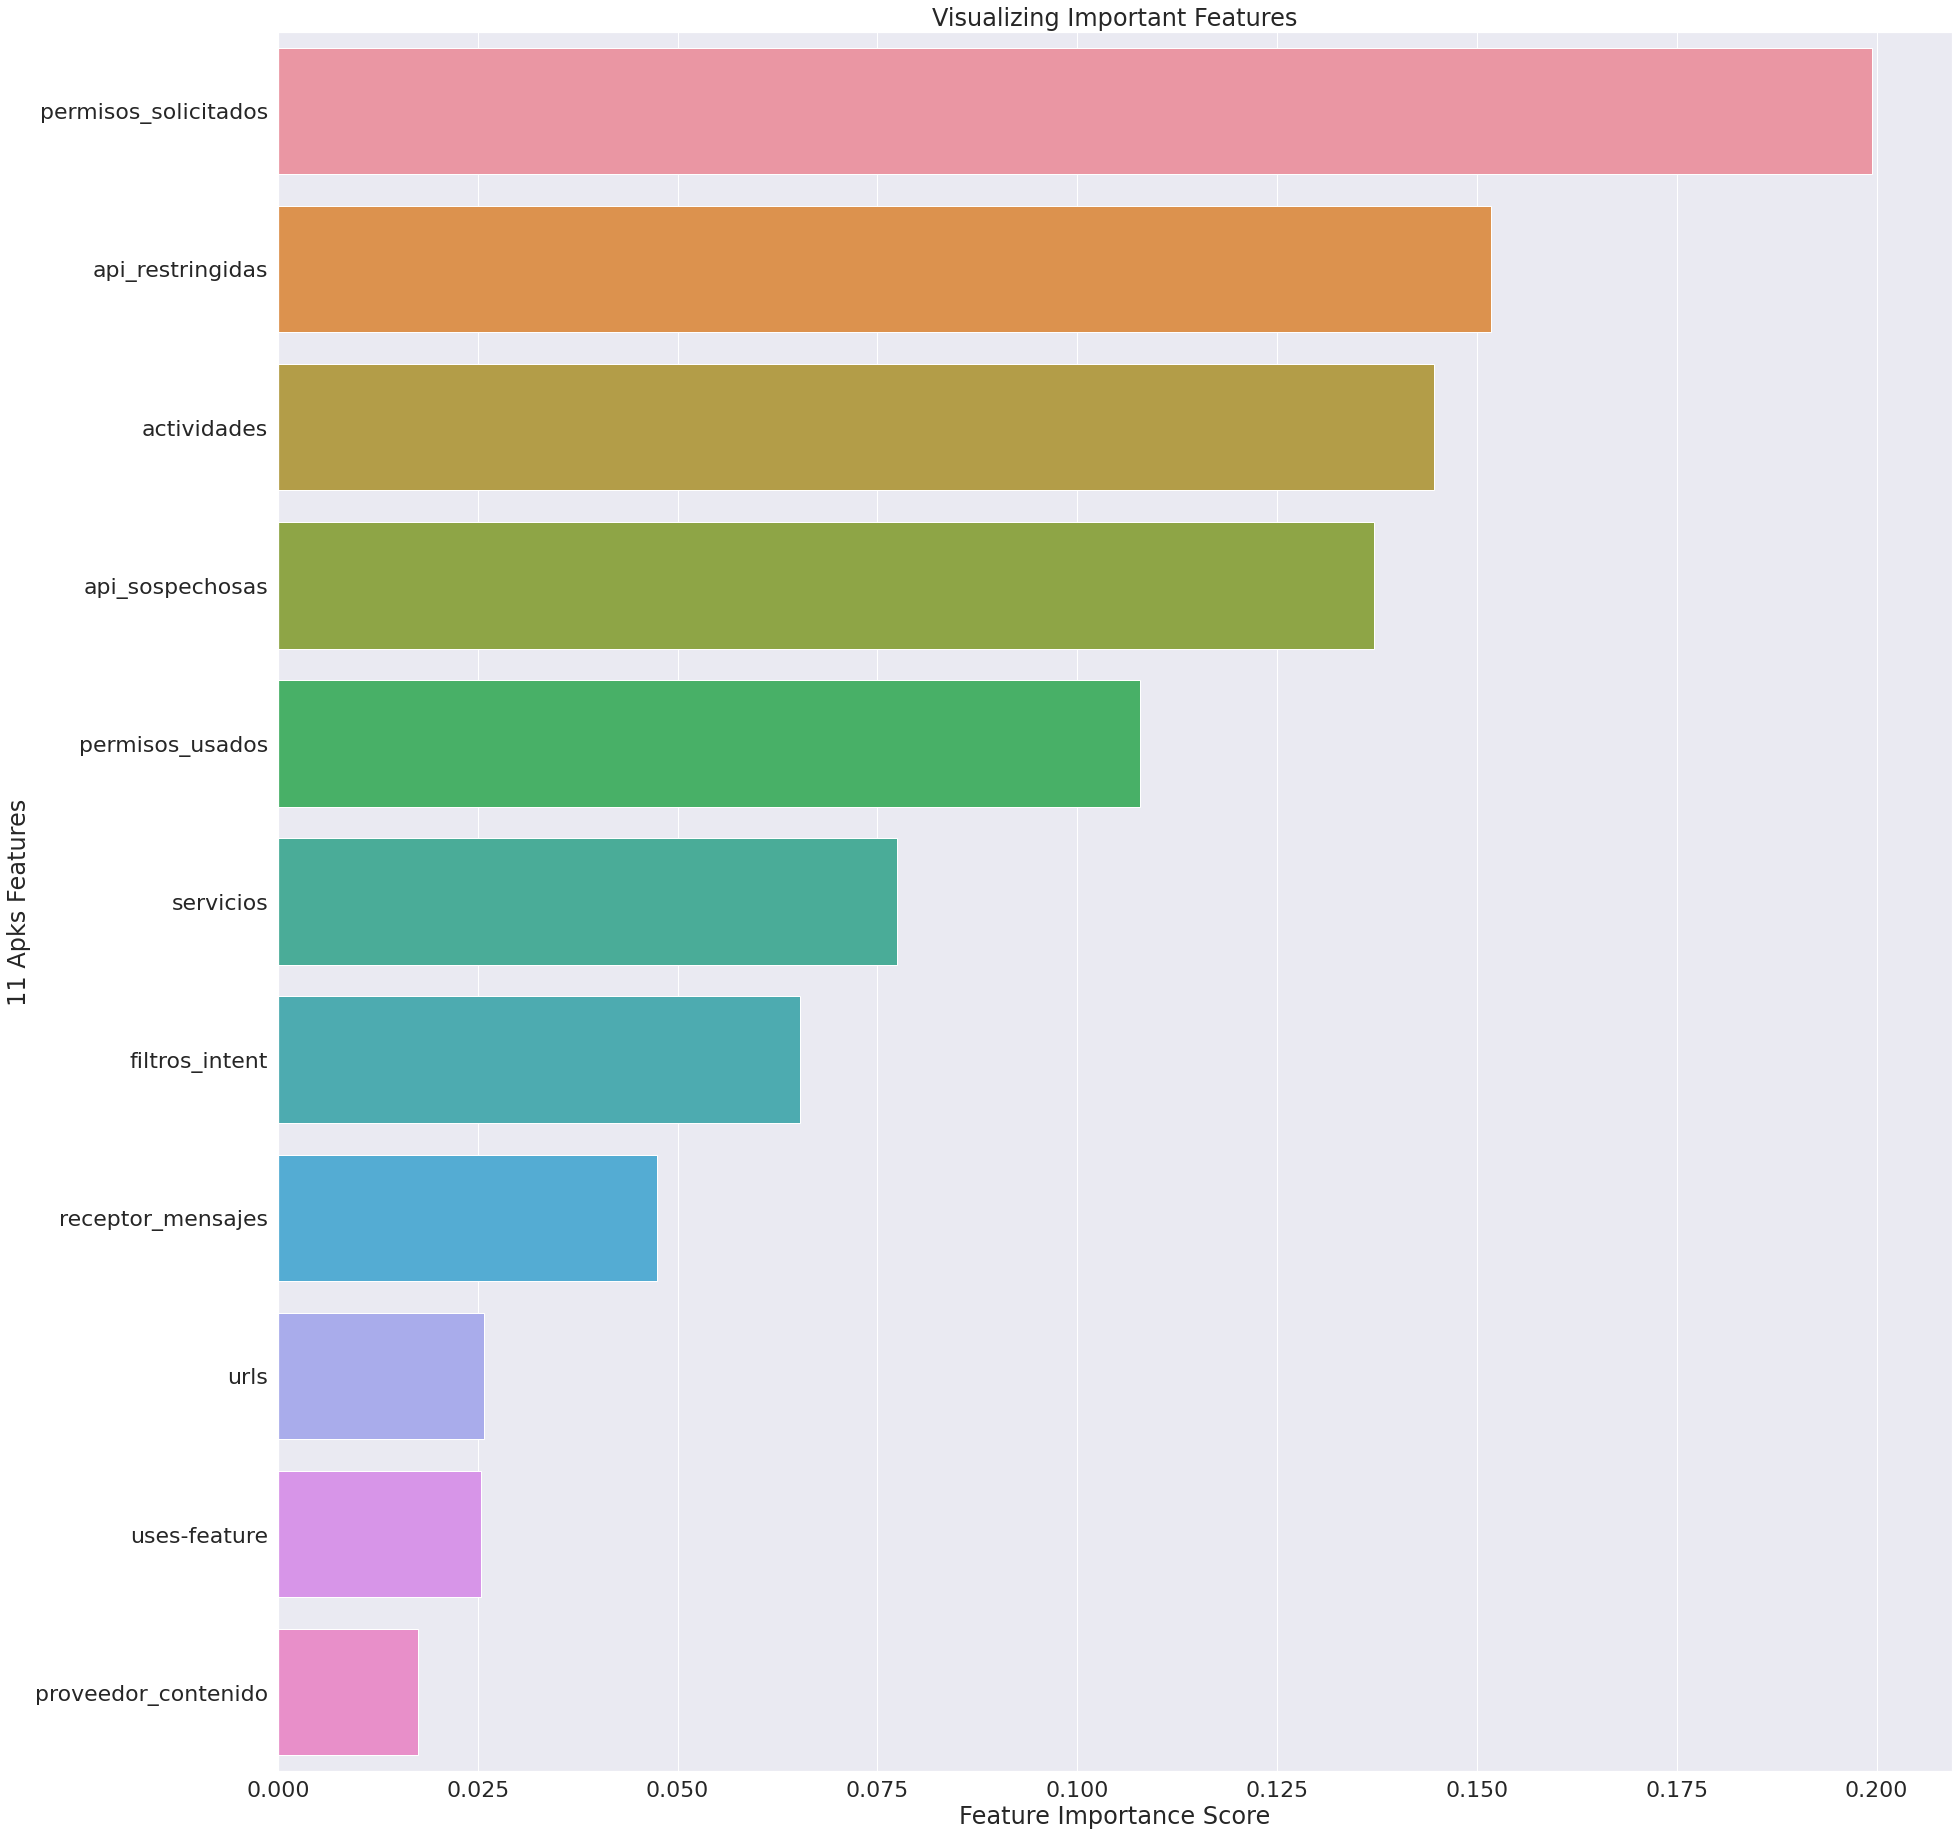

In [20]:
print('########################## MODELO DE CLASIFICACION USANDO FEATURES SELECCIONADOS ###########################')
print('############################# Encontrando features importantes con Scikit-learn ############################')
clf = RandomForestClassifier(random_state=15)
clf.fit(train_features, train_labelapp)

feature_names = list(dataset.iloc[:, 1:12].columns)
# print(feature_names)

# Calcular la importancia de cada uno de los 11 features
feature_importance = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
print(feature_importance)

print('################################## Grafico de barras con importantacia features ##################################')
figsize(30, 32)
# Crear barras de features del grafico
sns.barplot(x=feature_importance, y=feature_importance.index, seed=15)
# Añadir etiquetas de los features al grafico
plt.xlabel('Feature Importance Score')
plt.ylabel('11 Apks Features')
plt.title("Visualizing Important Features")
# plt.legend
plt.savefig('../code/plots/barras-importancia-11features.png')
plt.show()

In [21]:
'##################################### Random Forest con 11 features y SVC con 5 features  ######################################'
# Conjunto de 11 features para usar con RF
X = dataset.iloc[:, 1:12].values
# Conjunto de 5 primeros features (X_5) y de etiquetas (y)
X_5f = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados']]
y = dataset.iloc[:, 12].values

#orden de features según puntuación
#X_f = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados',
#              'servicios', 'filtros_intent', 'receptor_mensajes', 'urls', 'uses-feature', 'proveedor_contenido']]

# Separacion de datos y Estandarizacion de los mismos
# conjunto de datos de entrenamiento y prueba para usar con ...Performance
# Random Forest
train_features_11, test_features_11, train_labelapp_11, test_labelapp_11 = separe_standarize_data(X, y)
# Soporte Vectorial
train_features_5, test_features_5, train_labelapp_5, test_labelapp_5 = separe_standarize_data(X_5f, y)

# Modelo de clasificacion: Random Forest usando 5 top features
#clf_rfc_11f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_rfc_11f = RandomForestClassifier(random_state=15)
#clf_svc_top5f = SVC(C=1.0, kernel='rbf', gamma=0.73, max_iter=900, random_state=15)
clf_svc_top5f = SVC(random_state=15)


# Entrenamiento de modelos
clf_rfc_11f.fit(train_features_11, train_labelapp_11)
clf_svc_top5f.fit(train_features_5, train_labelapp_5)

# Obtención de perdicciones
y_pred_rfc11f = clf_rfc_11f.predict(test_features_11)
y_pred_svc5f = clf_svc_top5f.predict(test_features_5)

########### Métricas de RF usando 11 features ###########
Confusion Matrix 
 [[591 194]
 [140 755]]
Accuracy:  0.8011904761904762 --> 80.12%
Error Rate:  0.19880952380952377 --> 19.88%
Precision:  0.7955742887249737 --> 79.56%
Recall:  0.8435754189944135 --> 84.36%
F1 Score:  0.8188720173535792 --> 81.89%
########### Métricas de SV usando 5 features más importantes ###########
Confusion Matrix 
 [[535 250]
 [233 662]]
Accuracy:  0.7125 --> 71.25%
Error Rate:  0.2875 --> 28.75%
Precision:  0.7258771929824561 --> 72.59%
Recall:  0.7396648044692737 --> 73.97%
F1 Score:  0.7327061427780852 --> 73.27%


/home/lechu/Documents/GitHub/Prueba-de-concepto/entorno_virtual _(venv)/venv-3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=.2% as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


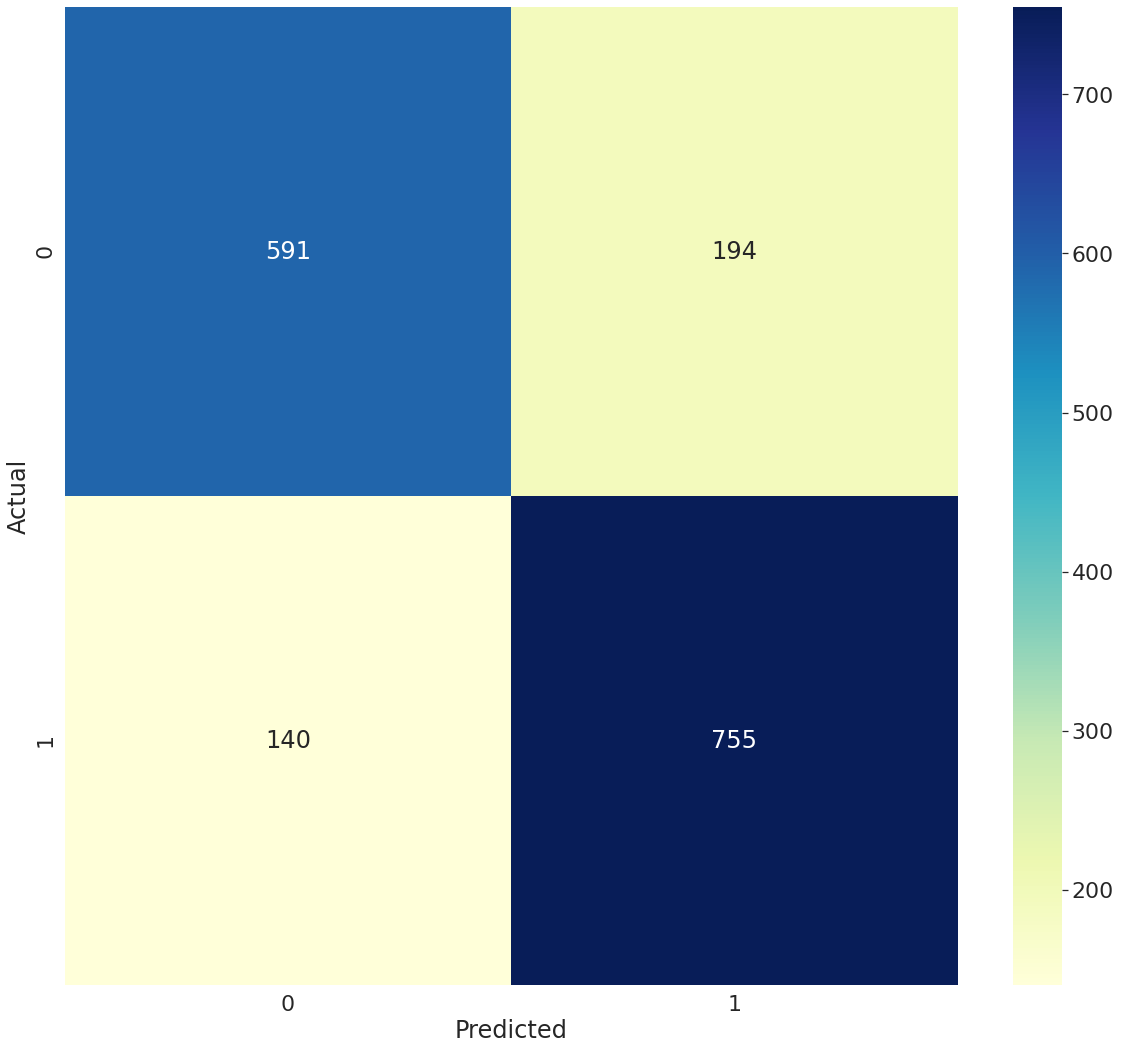

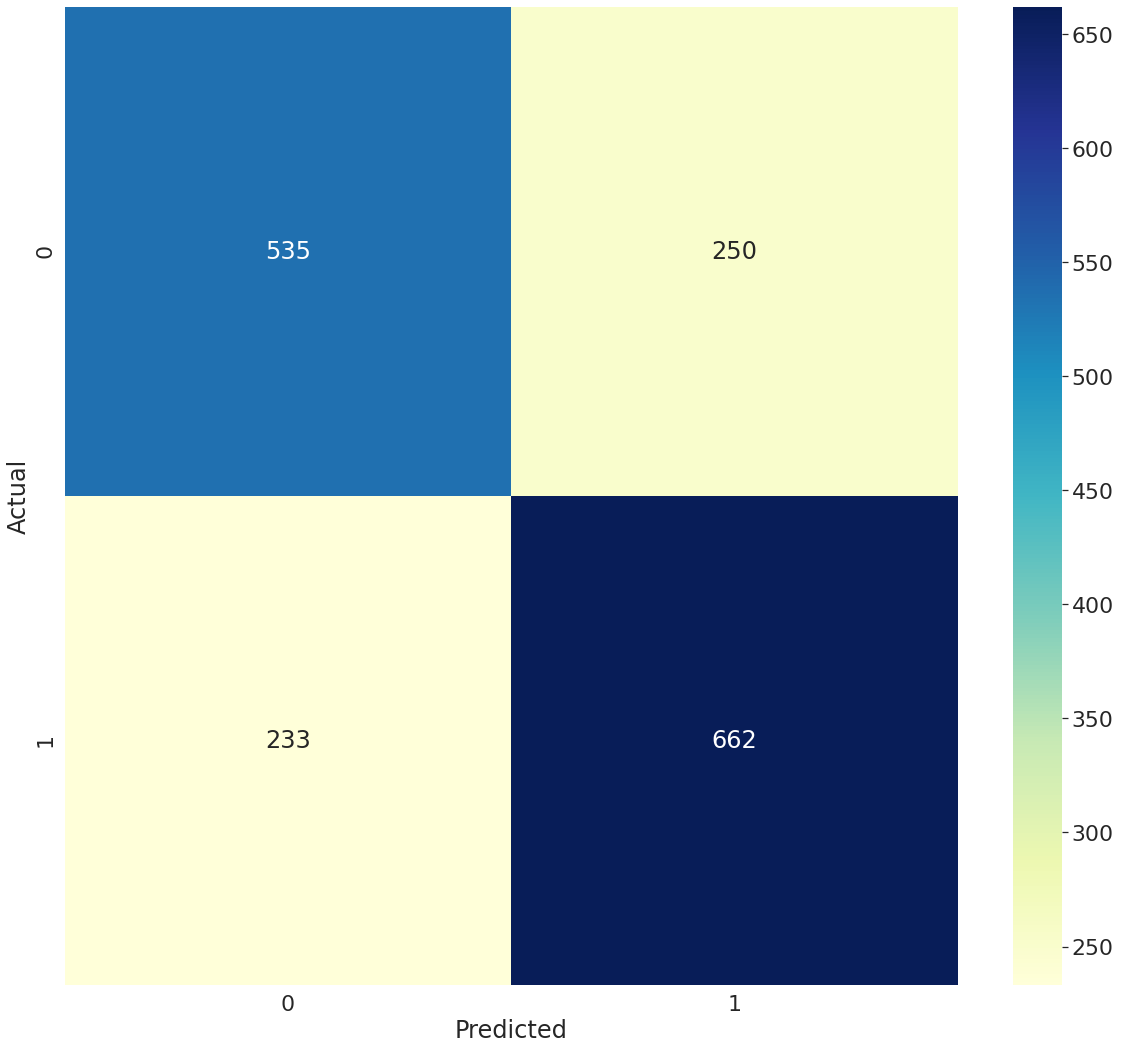

In [22]:
print('########### Métricas de RF usando 11 features ###########' )
error_rate_rfc11f, accuracy_rfc11f, precision_rfc11f, recall_rfc11f, f1_rfc11f = obtain_metrics(test_labelapp_11, y_pred_rfc11f)
plot_confussion_matrix('rfc-11features', test_labelapp_11, y_pred_rfc11f)

print('########### Métricas de SV usando 5 features más importantes ###########' )
error_rate_svc5f, accuracy_svc5f, precision_svc5f, recall_svc5f, f1_svc5f = obtain_metrics(test_labelapp_5, y_pred_svc5f)
plot_confussion_matrix('svc_5f', test_labelapp_5, y_pred_svc5f)


In [23]:
'##################################### Random Forest con 11 features y SVC con 6 features  ######################################'
# Conjunto de 11 features para usar con RF
X = dataset.iloc[:, 1:12].values
# Conjunto de 6 primeros features (X_6) y de etiquetas (y)
X_6f = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados', 
               'servicios']]
y = dataset.iloc[:, 12].values

# Separacion de datos y Estandarizacion de los mismos
# conjunto de datos de entrenamiento y prueba para usar con ...
# Random Forest
train_features_11, test_features_11, train_labelapp_11, test_labelapp_11 = separe_standarize_data(X, y)
# Soporte Vectorial
train_features_6, test_features_6, train_labelapp_6, test_labelapp_6 = separe_standarize_data(X_6f, y)

# Modelo de clasificacion: Random Forest usando 5 top features
#clf_rfc_11f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_rfc_11f = RandomForestClassifier(random_state=15)
#clf_svc_top6f = SVC(C=1.0, kernel='rbf', gamma=0.73, max_iter=900, random_state=15)
clf_svc_top6f = SVC(random_state=15)

# Entrenamiento de modelos
clf_rfc_11f.fit(train_features_11, train_labelapp_11)
clf_svc_top6f.fit(train_features_6, train_labelapp_6)

# Obtención de perdicciones
y_pred_rfc11f = clf_rfc_11f.predict(test_features_11)
y_pred_svc6f = clf_svc_top6f.predict(test_features_6)

########### Métricas de RF usando 11 features ###########
Confusion Matrix 
 [[591 194]
 [140 755]]
Accuracy:  0.8011904761904762 --> 80.12%
Error Rate:  0.19880952380952377 --> 19.88%
Precision:  0.7955742887249737 --> 79.56%
Recall:  0.8435754189944135 --> 84.36%
F1 Score:  0.8188720173535792 --> 81.89%
########### Métricas de SV usando 6 features más importantes ###########
Confusion Matrix 
 [[549 236]
 [232 663]]
Accuracy:  0.7214285714285714 --> 72.14%
Error Rate:  0.2785714285714286 --> 27.86%
Precision:  0.7374860956618465 --> 73.75%
Recall:  0.740782122905028 --> 74.08%
F1 Score:  0.7391304347826086 --> 73.91%


/home/lechu/Documents/GitHub/Prueba-de-concepto/entorno_virtual _(venv)/venv-3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=.2% as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


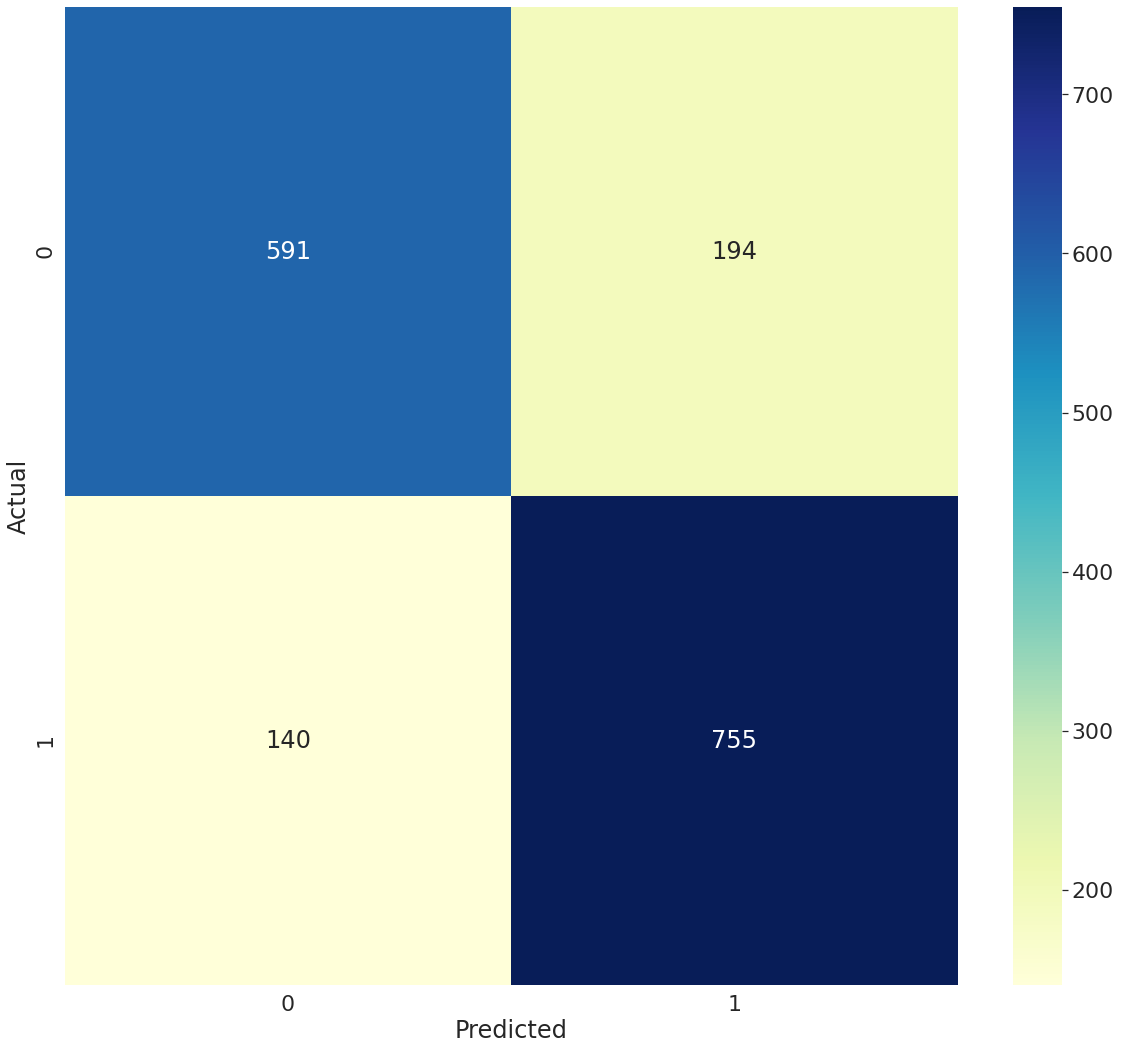

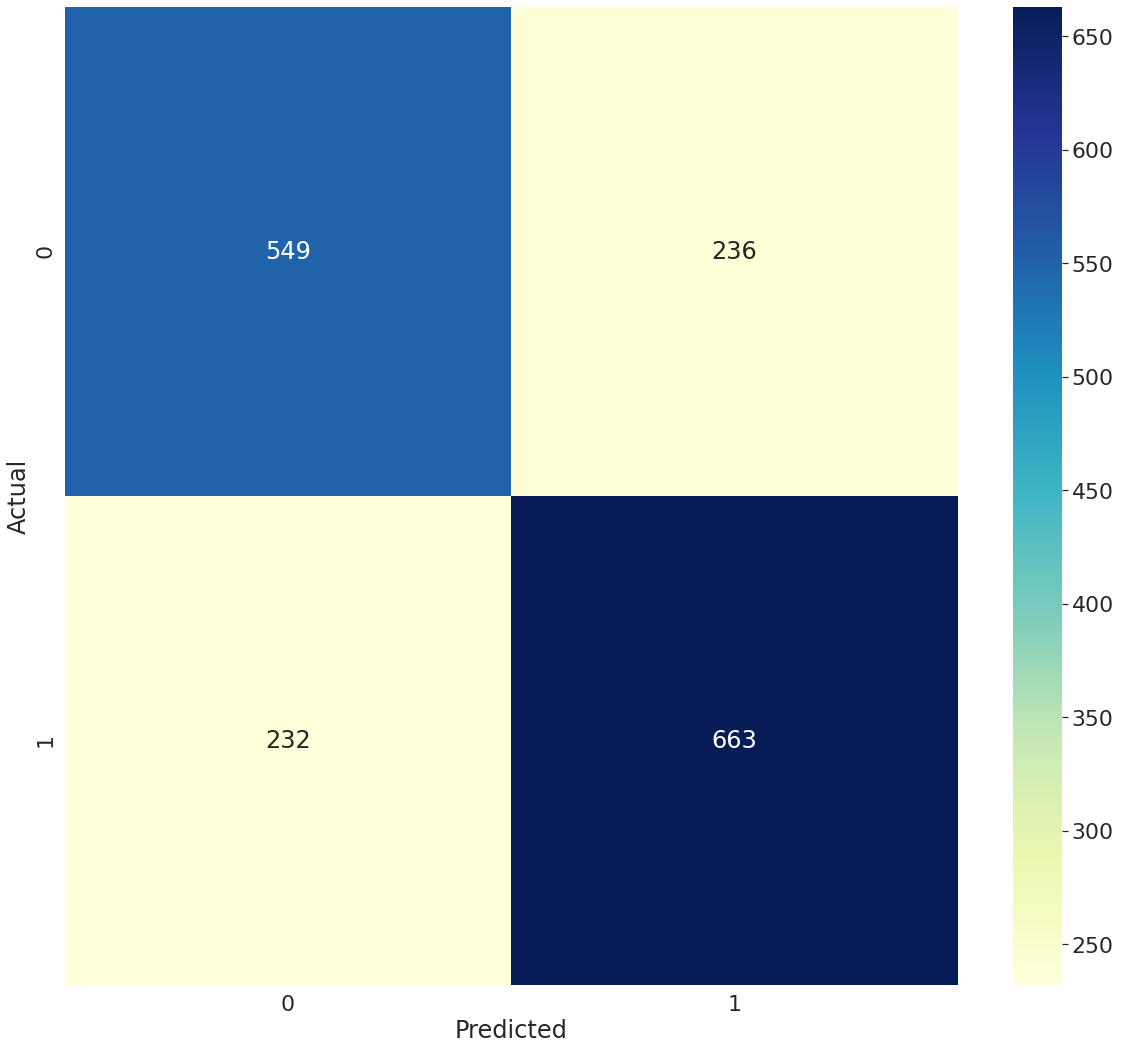

In [24]:
print('########### Métricas de RF usando 11 features ###########' )
error_rate_rfc11f, accuracy_rfc11f, precision_rfc11f, recall_rfc11f, f1_rfc11f = obtain_metrics(test_labelapp_11, y_pred_rfc11f)
plot_confussion_matrix('rfc-11features', test_labelapp_11, y_pred_rfc11f)

print('########### Métricas de SV usando 6 features más importantes ###########' )
error_rate_svc6f, accuracy_svc6f, precision_svc6f, recall_svc6f, f1_svc6f = obtain_metrics(test_labelapp_6, y_pred_svc6f)
plot_confussion_matrix('svc_6f', test_labelapp_6, y_pred_svc6f)

In [25]:
'######################### Modelos de Random Forest usando diferentes cantidades de features  #########################'
# Crear modelo en base a las características más relevantes

# ELEGIR UNO DE LOS CONJUNTOS DE FEATURES PARA USARLO EN EL ENTRENAMIENTO DEL MODELO
# low 4 features
X_4l = dataset[['proveedor_contenido', 'urls', 'uses-feature', 'receptor_mensajes']]
# low 6 features
X_6l = dataset[['proveedor_contenido', 'urls', 'uses-feature', 'receptor_mensajes', 'filtros_intent', 'servicios']]
# top 5 features
X_5f = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados']]
# top 6 features
X_6 = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados',
               'servicios']]
# top 8 features
X_8 = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados',
               'servicios', 'filtros_intent', 'receptor_mensajes']]
# top 10 features
X_10 = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados',
                'servicios', 'filtros_intent', 'receptor_mensajes', 'urls', 'uses-feature']]
y = dataset.iloc[:, 12].values

# Separacion de datos y Estandarizacion de los mismos
train_features_4l, test_features_4l, train_labelapp_4l, test_labelapp_4l = separe_standarize_data(X_4l, y)
train_features_6l, test_features_6l, train_labelapp_6l, test_labelapp_6l = separe_standarize_data(X_6l, y)
train_features_5, test_features_5, train_labelapp_5, test_labelapp_5 = separe_standarize_data(X_5f, y)
train_features_6, test_features_6, train_labelapp_6, test_labelapp_6 = separe_standarize_data(X_6, y)
train_features_8, test_features_8, train_labelapp_8, test_labelapp_8 = separe_standarize_data(X_8, y)
train_features_10, test_features_10, train_labelapp_10, test_labelapp_10 = separe_standarize_data(X_10, y)

# Modelo de clasificacion 2: Random Forest usando 10 top features, 1000 arboles y con profundidad de 100 cada uno
clf_rfc_f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_rfc_low4f = RandomForestClassifier(random_state=15)
clf_rfc_low6f = RandomForestClassifier(random_state=15)
clf_rfc_top5f = RandomForestClassifier(random_state=15)
clf_rfc_top6f = RandomForestClassifier(random_state=15)
clf_rfc_top8f = RandomForestClassifier(random_state=15)
clf_rfc_top10f = RandomForestClassifier(random_state=15)

# Entrenamiento de modeloS
clf_rfc_low4f.fit(train_features_4l, train_labelapp_4l)
clf_rfc_low6f.fit(train_features_6l, train_labelapp_6l)
clf_rfc_top5f.fit(train_features_5, train_labelapp_5)
clf_rfc_top6f.fit(train_features_6, train_labelapp_6)
clf_rfc_top8f.fit(train_features_8, train_labelapp_10)
clf_rfc_top10f.fit(train_features_10, train_labelapp_10)

# Obtención de perdicciones
y_pred_4lf = clf_rfc_low4f.predict(test_features_4l)
y_pred_6lf = clf_rfc_low6f.predict(test_features_6l)
y_pred_5f = clf_rfc_top5f.predict(test_features_5)
y_pred_6f = clf_rfc_top6f.predict(test_features_6)
y_pred_8f = clf_rfc_top8f.predict(test_features_8)
y_pred_10f = clf_rfc_top10f.predict(test_features_10)

######################## Resultados del modelo usando features con mayor importancia #########################
########### Métricas y matriz de confusion obtenidas para ###########
########### 4 últimos features ###########
Confusion Matrix 
 [[565 220]
 [467 428]]
Accuracy:  0.5910714285714286 --> 59.11%
Error Rate:  0.4089285714285714 --> 40.89%
Precision:  0.6604938271604939 --> 66.05%
Recall:  0.4782122905027933 --> 47.82%
F1 Score:  0.5547634478289047 --> 55.48%
########### 6 últimos features ###########
Confusion Matrix 
 [[614 171]
 [435 460]]
Accuracy:  0.6392857142857142 --> 63.93%
Error Rate:  0.36071428571428577 --> 36.07%
Precision:  0.7290015847860539 --> 72.90%
Recall:  0.5139664804469274 --> 51.40%
F1 Score:  0.6028833551769333 --> 60.29%
########### 5 primeros features ###########
Confusion Matrix 
 [[590 195]
 [162 733]]
Accuracy:  0.7875 --> 78.75%
Error Rate:  0.21250000000000002 --> 21.25%
Precision:  0.7898706896551724 --> 78.99%
Recall:  0.8189944134078212 --> 81.

/home/lechu/Documents/GitHub/Prueba-de-concepto/entorno_virtual _(venv)/venv-3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=.2% as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


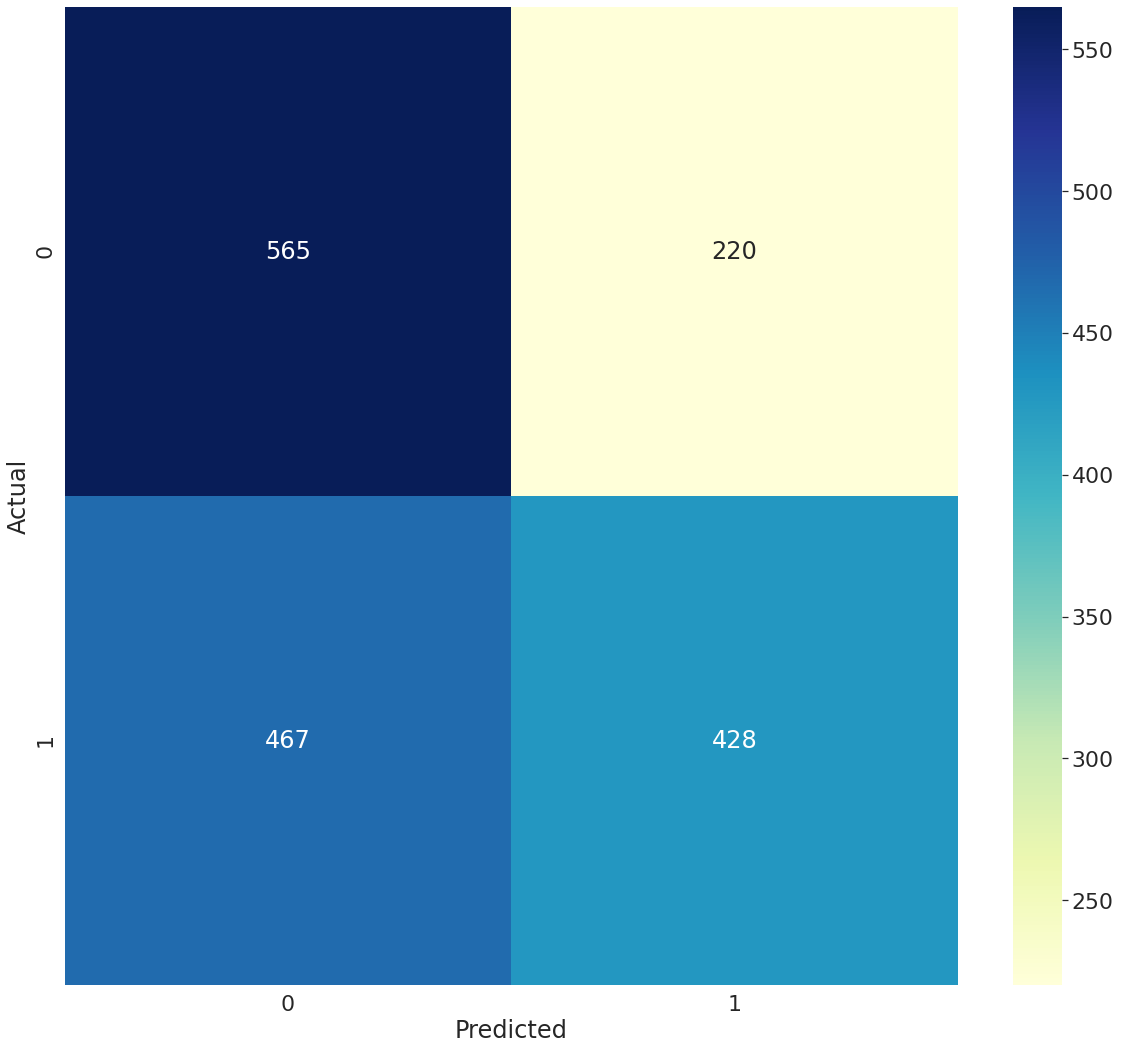

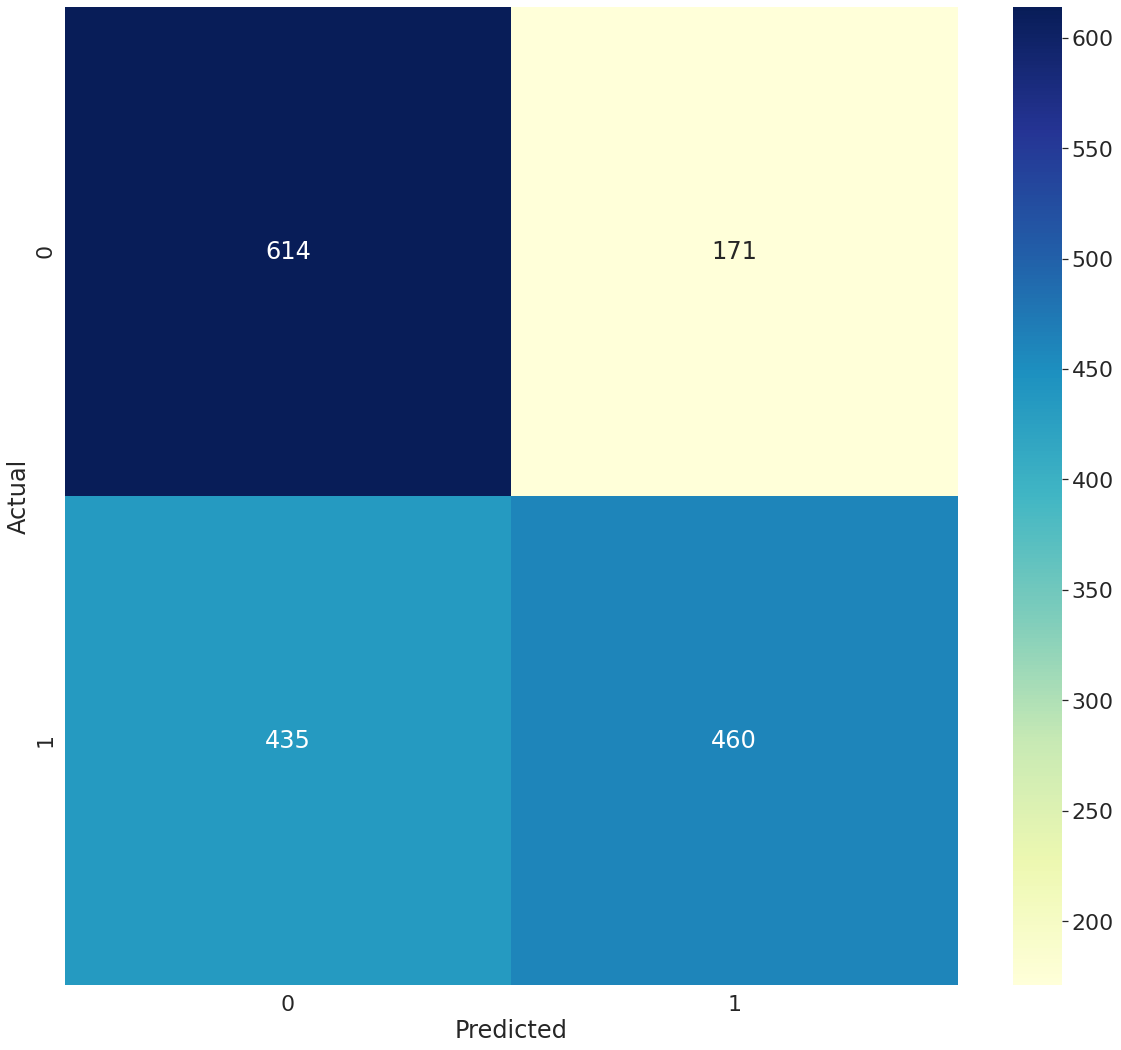

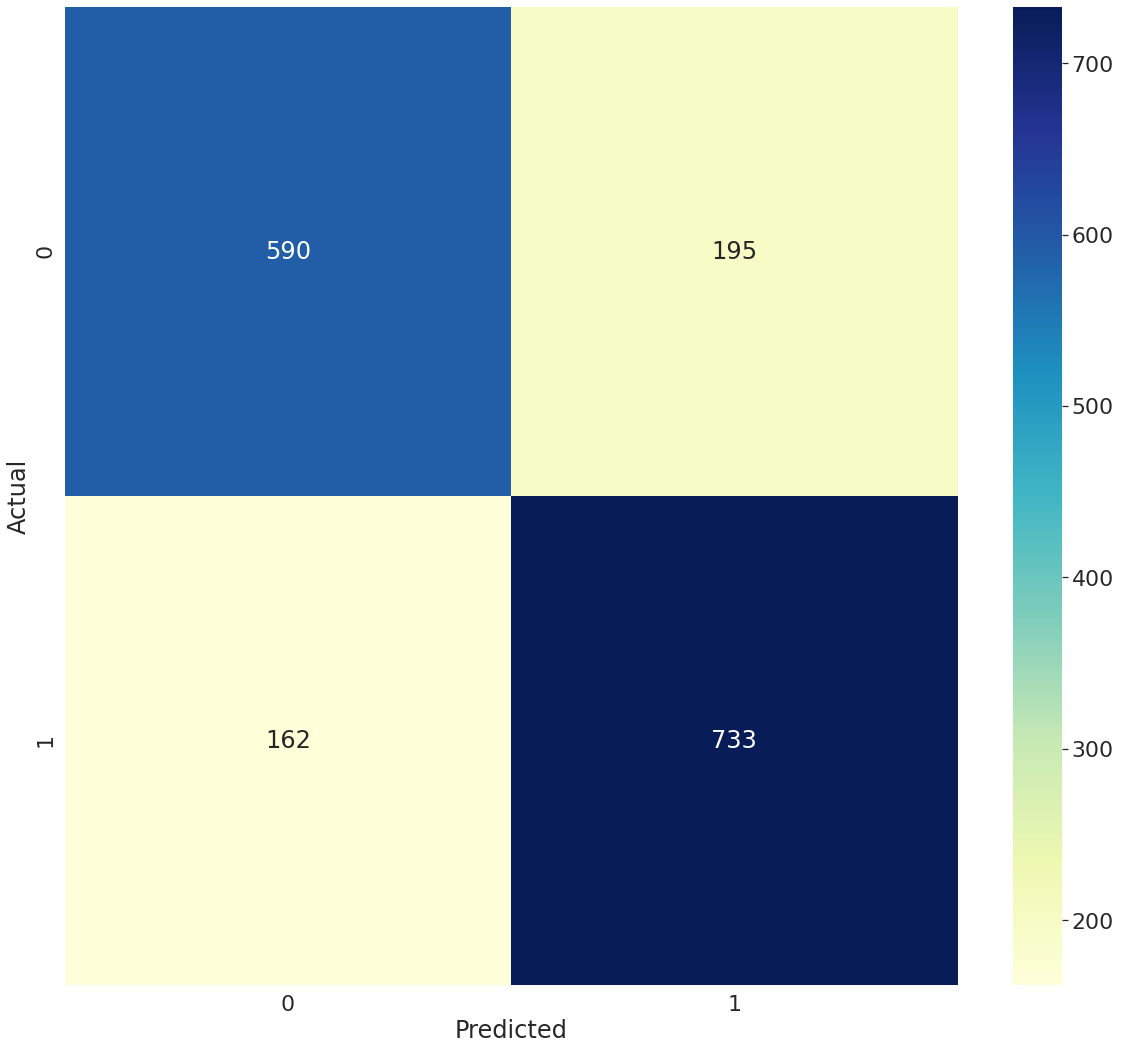

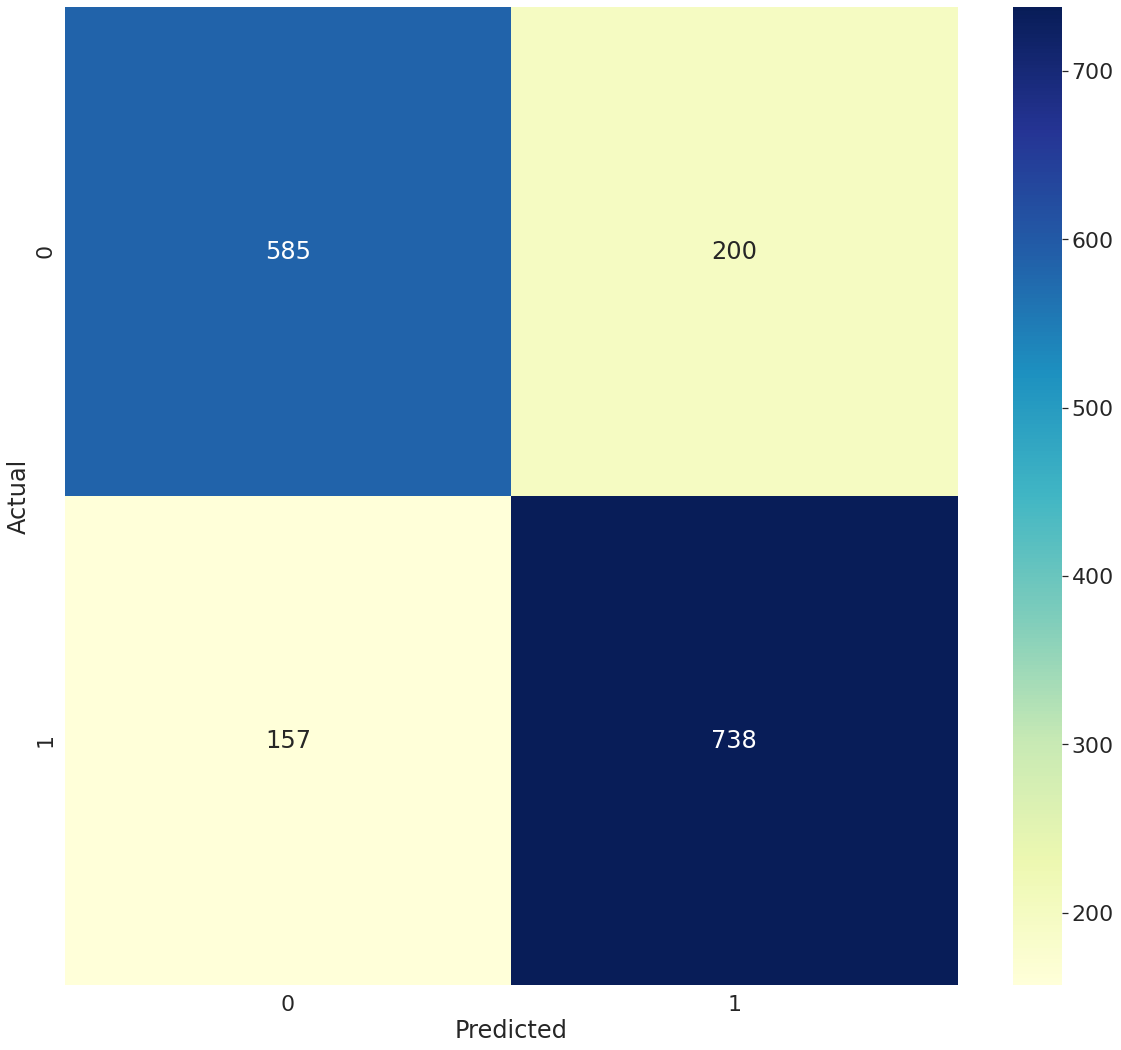

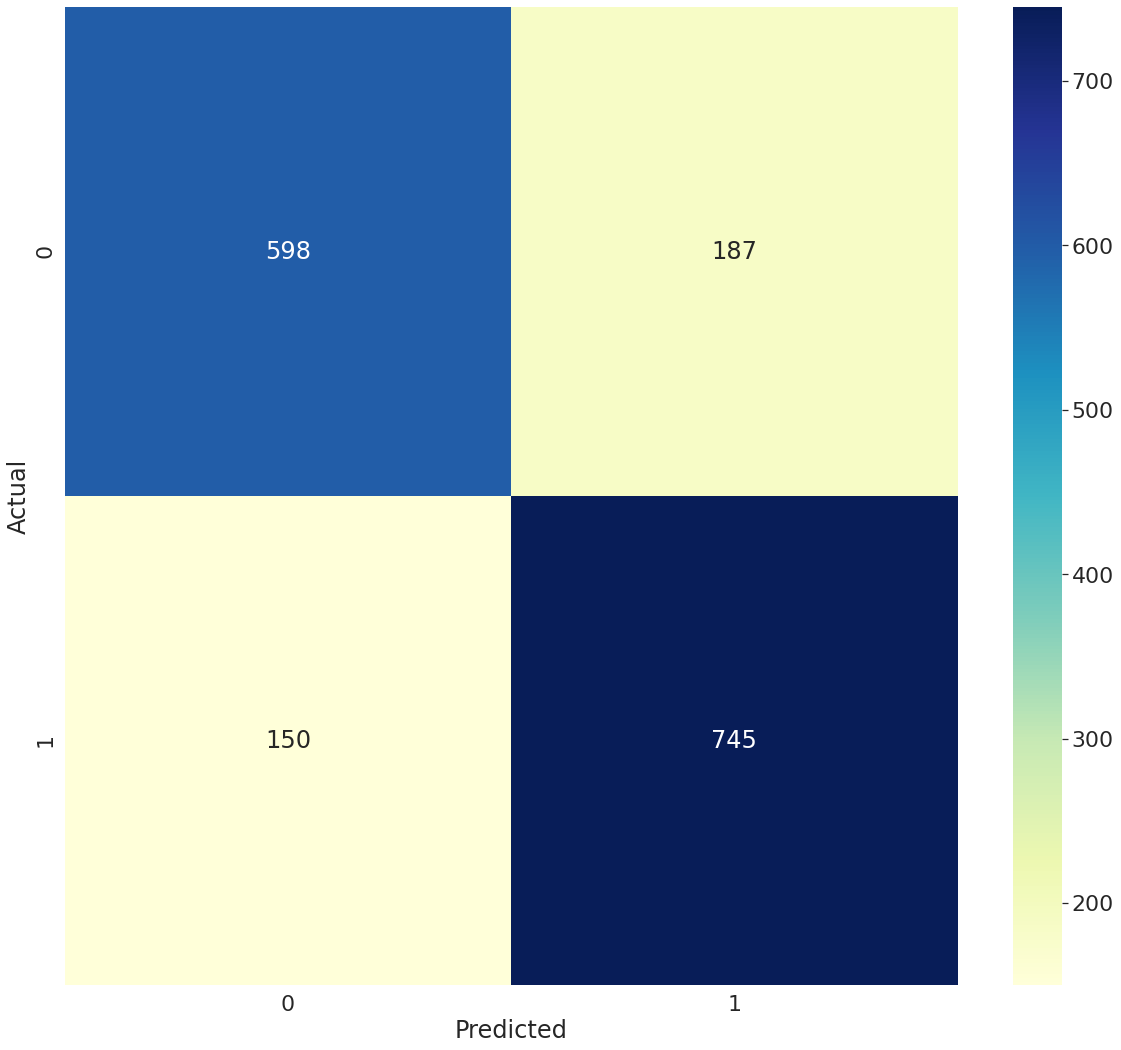

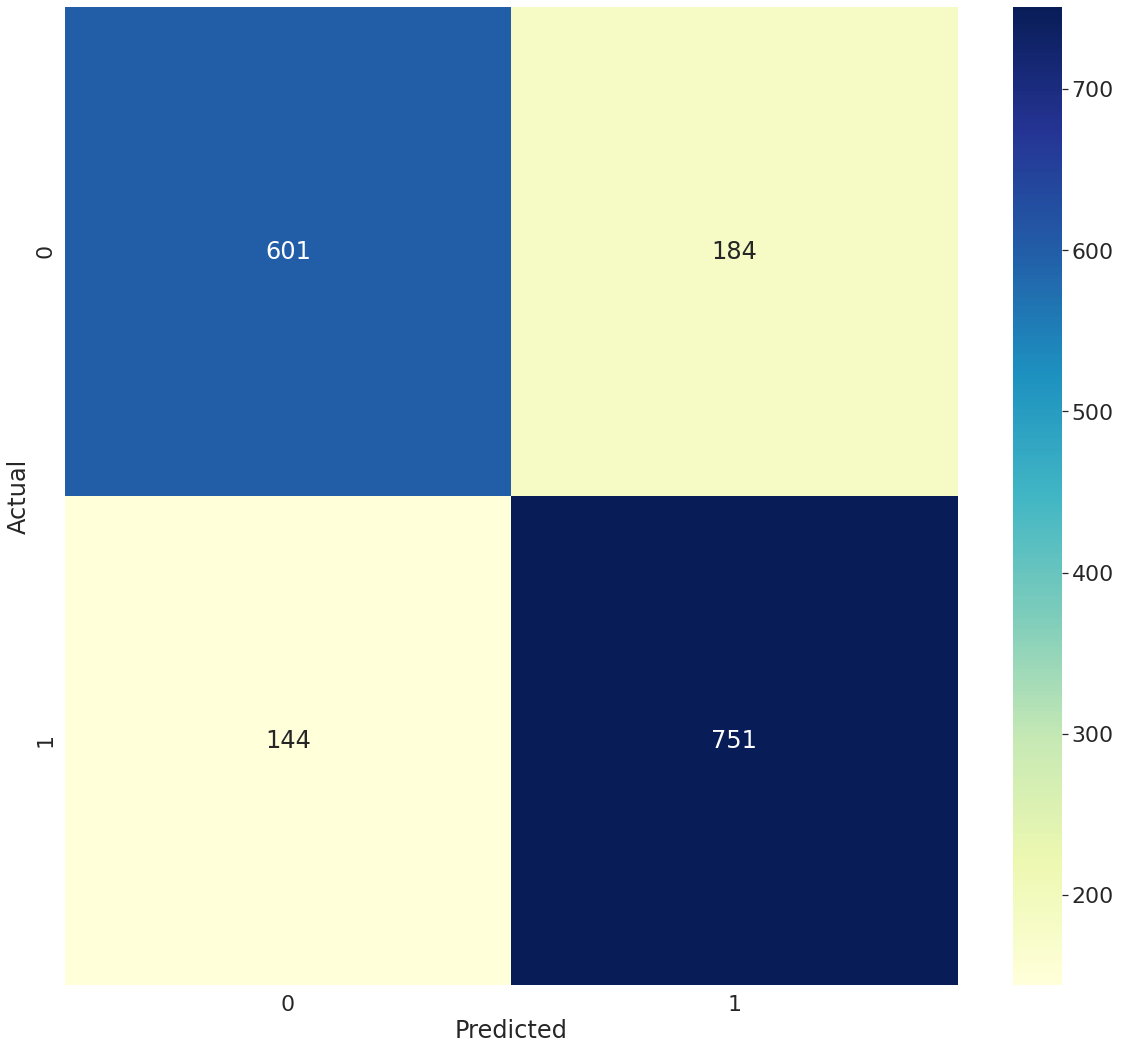

In [26]:
print('######################## Resultados del modelo usando features con mayor importancia #########################')
print('########### Métricas y matriz de confusion obtenidas para ###########')
print('########### 4 últimos features ###########')
error_rate_rfc4lf, accuracy_rfc4lf, precision_rfc4lf, recall_rfc4lf, f1_rfc4lf = obtain_metrics(test_labelapp_4l, y_pred_4lf)
plot_confussion_matrix('rfc_4lf', test_labelapp_4l, y_pred_4lf)
print('########### 6 últimos features ###########')
error_rate_rfc6lf, accuracy_rfc6lf, precision_rfc6lf, recall_rfc6lf, f1_rfc6lf = obtain_metrics(test_labelapp_6l, y_pred_6lf)
plot_confussion_matrix('rfc_6lf', test_labelapp_6l, y_pred_6lf)
print('########### 5 primeros features ###########')
error_rate_rfc5f, accuracy_rfc5f, precision_rfc5f, recall_rfc5f, f1_rfc5f = obtain_metrics(test_labelapp_5, y_pred_5f)
plot_confussion_matrix('rfc_5f', test_labelapp_5, y_pred_5f)
print('########### 6 primeros features ###########')
error_rate_rfc6f, accuracy_rfc6f, precision_rfc6f, recall_rfc6f, f1_rfc6f = obtain_metrics(test_labelapp_6, y_pred_6f)
plot_confussion_matrix('rfc_6f', test_labelapp_6, y_pred_6f)
print('########### 8 primeros features ###########')
error_rate_rfc8f, accuracy_rfc8f, precision_rfc8f, recall_rfc8f, f1_rfc8f = obtain_metrics(test_labelapp_8, y_pred_8f)
plot_confussion_matrix('rfc_8f', test_labelapp_8, y_pred_8f)
print('########### 10 primeros features ###########')
error_rate_rfc10f, accuracy_rfc10f, precision_rfc10f, recall_rfc10f, f1_rfc10f = obtain_metrics(test_labelapp_10, y_pred_10f)
plot_confussion_matrix('rfc_10f', test_labelapp_10, y_pred_10f)



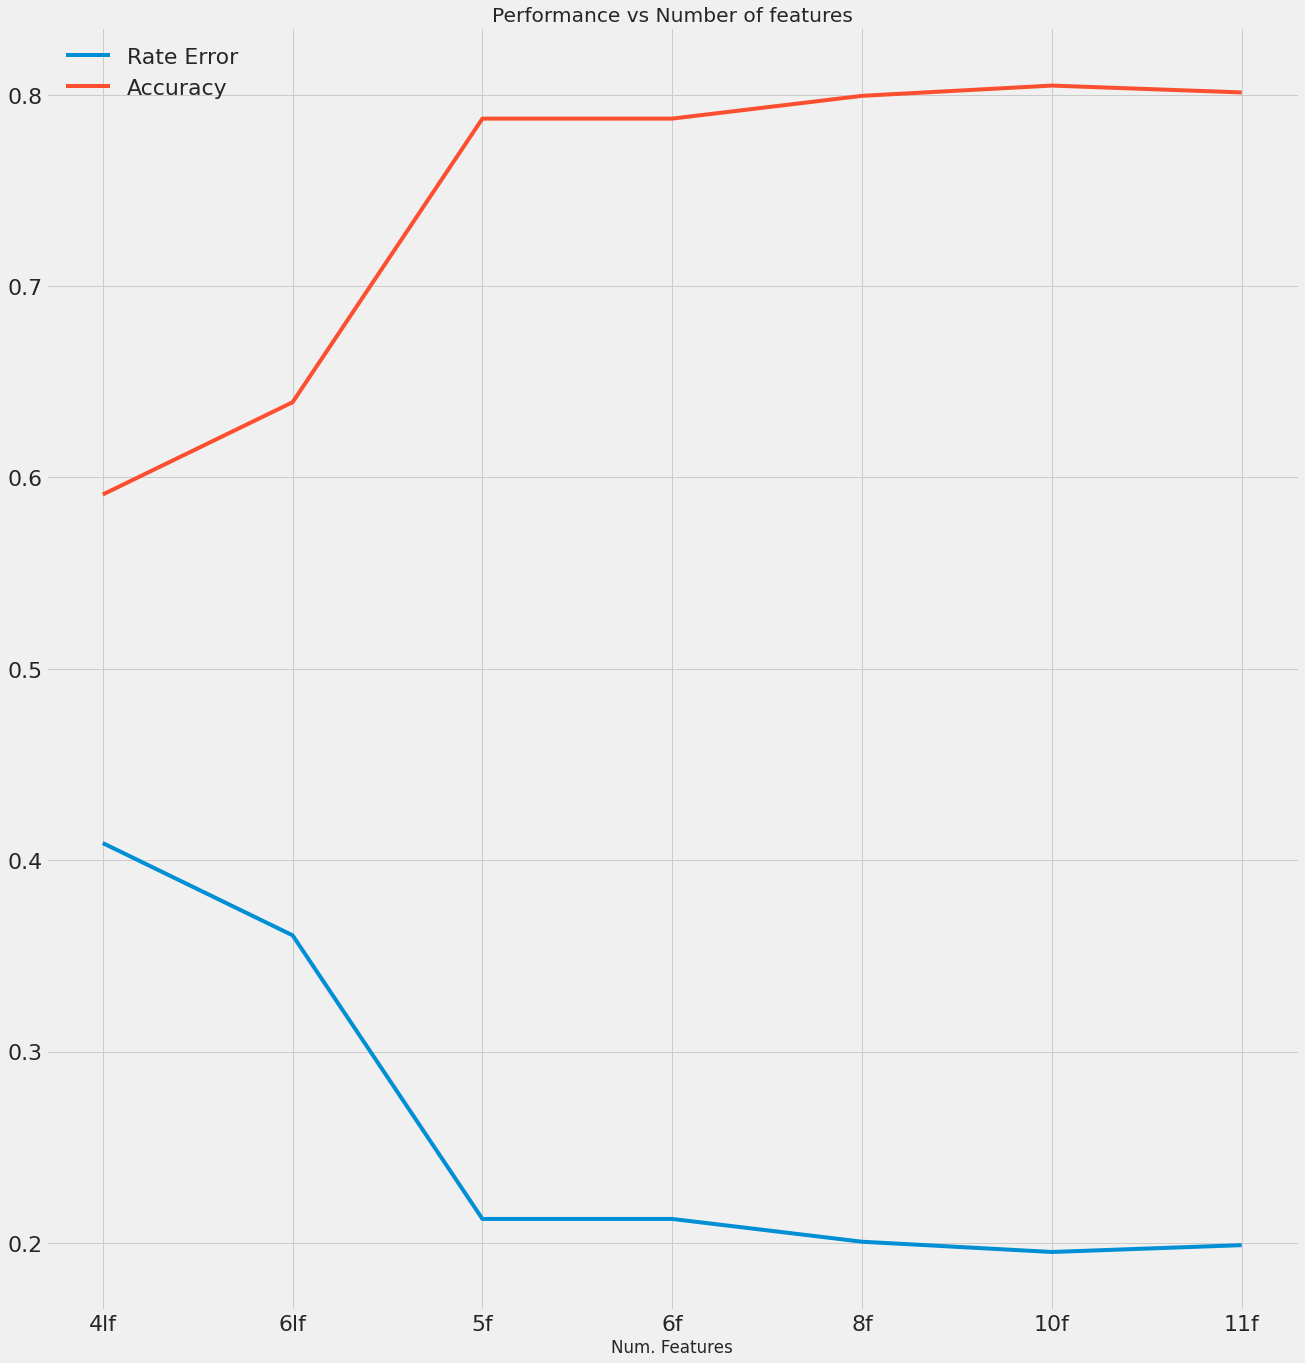

In [27]:
'######################################## Gráfico Performance vs Num. Features ########################################'
figsize(20, 22)
plt.style.use('fivethirtyeight')
plt.plot(['4lf', '6lf', '5f', '6f', '8f', '10f', '11f'],
         [error_rate_rfc4lf, error_rate_rfc6lf, error_rate_rfc5f, error_rate_rfc6f, error_rate_rfc8f, error_rate_rfc10f,
          error_rate_rfc11f], label='Rate Error')
plt.plot(['4lf', '6lf', '5f', '6f', '8f', '10f', '11f'],
         [accuracy_rfc4lf, accuracy_rfc6lf, accuracy_rfc5f, accuracy_rfc6f, accuracy_rfc8f, accuracy_rfc10f,
          accuracy_rfc11f], label='Accuracy')
plt.xlabel('Num. Features')
plt.ylabel('')
plt.legend()
plt.title('Performance vs Number of features')
plt.savefig('../code/plots/plot-performance-vs-numfeatures.png')
plt.show()


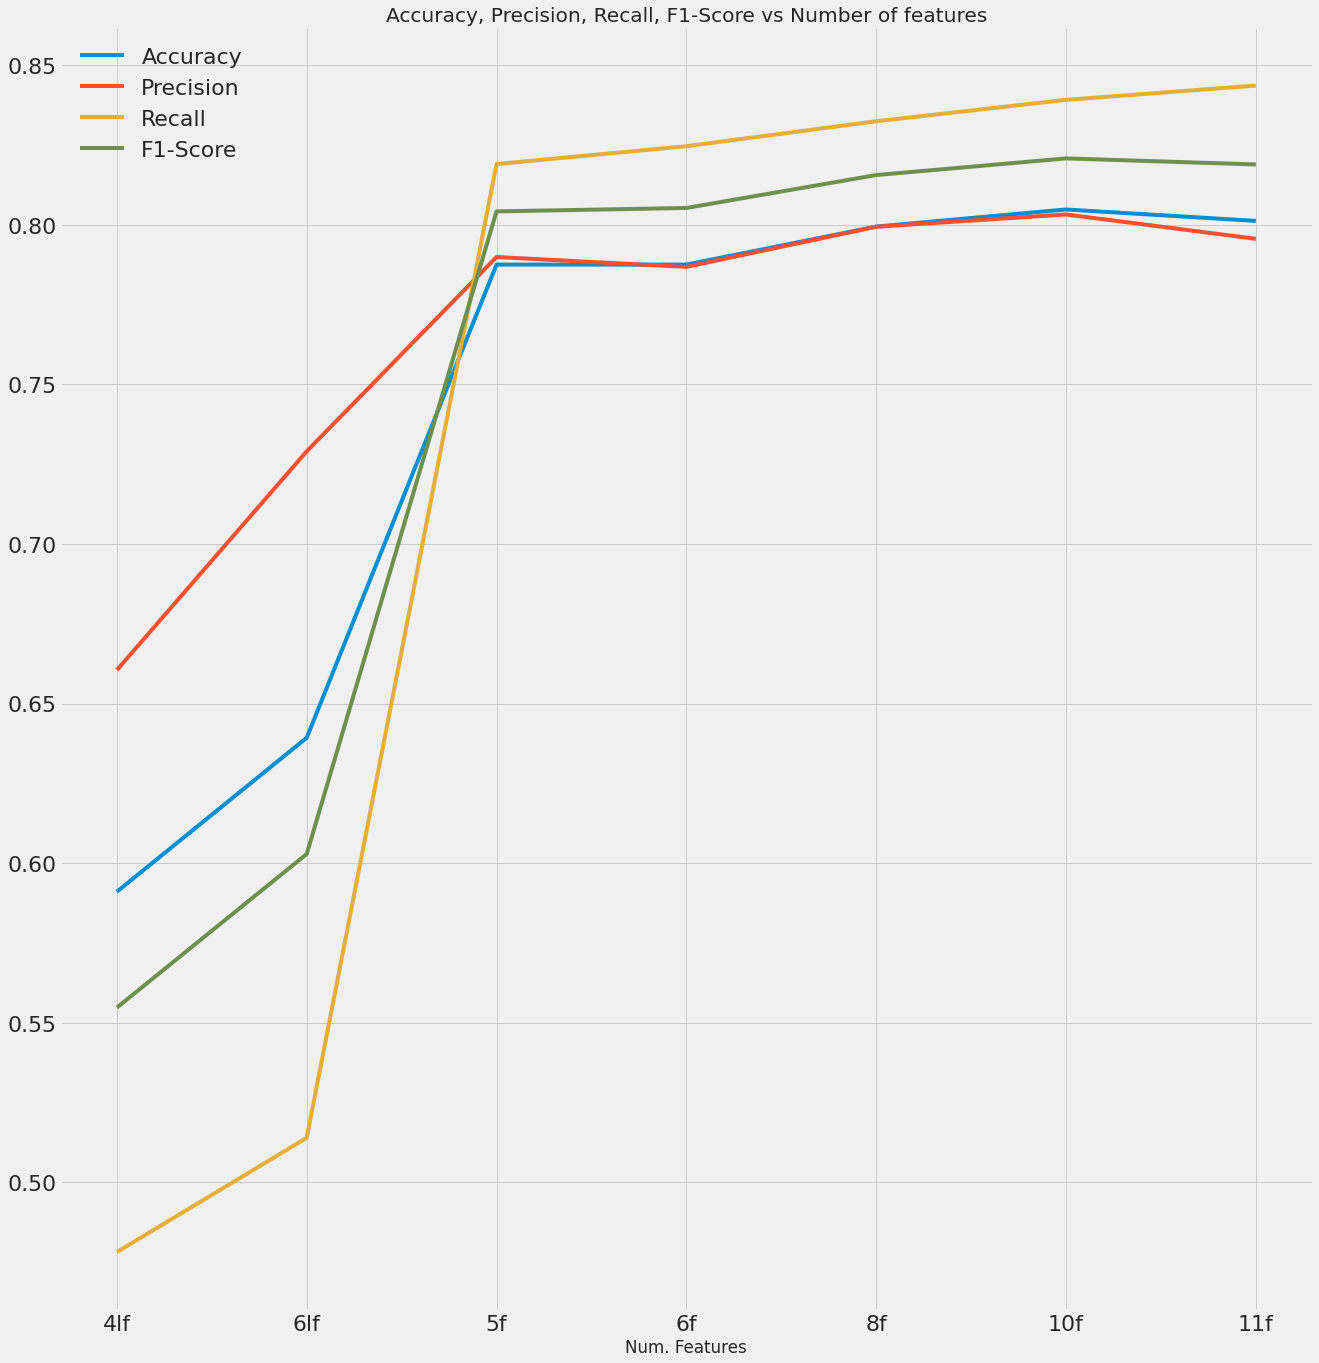

In [68]:
'################################### Gráfico Accuracy, Precision, Recall, F1 vs Num. Features ###################################'
figsize(20, 22)
plt.style.use('fivethirtyeight')
plt.plot(['4lf', '6lf', '5f', '6f', '8f', '10f', '11f'],
         [accuracy_rfc4lf, accuracy_rfc6lf, accuracy_rfc5f, accuracy_rfc6f, accuracy_rfc8f, accuracy_rfc10f,
          accuracy_rfc11f], label='Accuracy')
plt.plot(['4lf', '6lf', '5f', '6f', '8f', '10f', '11f'],
         [precision_rfc4lf, precision_rfc6lf, precision_rfc5f, precision_rfc6f, precision_rfc8f, precision_rfc10f,
          precision_rfc11f], label='Precision')
plt.plot(['4lf', '6lf', '5f', '6f', '8f', '10f', '11f'],
         [recall_rfc4lf, recall_rfc6lf, recall_rfc5f, recall_rfc6f, recall_rfc8f, recall_rfc10f,
          recall_rfc11f], label='Recall')
plt.plot(['4lf', '6lf', '5f', '6f', '8f', '10f', '11f'],
         [f1_rfc4lf , f1_rfc6lf,  f1_rfc5f, f1_rfc6f, f1_rfc8f, f1_rfc10f,
          f1_rfc11f], label='F1-Score')
plt.xlabel('Num. Features')
plt.ylabel('')
plt.legend()
plt.title('Accuracy, Precision, Recall, F1-Score vs Number of features')
plt.savefig('../code/plots/plot-acc_prec_recall_f1-vs-numfeatures.png')
plt.show()

In [ ]:
print('######################### TUNEO DE HIPERPARÁMETRO DE NUM. ÁRBOLES CON ITERACIONES #########################')
clf_rfc_11f = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=110, max_features='sqrt',
                                     min_samples_leaf=1, min_samples_split=19, bootstrap=True, random_state=15)
trees, train_loss, test_loss = [], [], []
# Afinación de hiperparámetro del número de árboles (n_estimators)
for iter in range(1089):
    # Entrenamiento del modelo
    clf_rfc_11f.fit(train_features, train_labelapp)
    # Obtención de predicciones
    y_train_pred_rfc = clf_rfc_11f.predict(train_features)
    y_test_pred_rfc = clf_rfc_11f.predict(test_features)
    # Cálculo de Error Cuadrado Medio (MSE)
    mse_train = mean_squared_error(train_labelapp, y_train_pred_rfc)
    mse_test = mean_squared_error(test_labelapp, y_test_pred_rfc)
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    # Acumulación de árboles
    trees += [clf_rfc_11f.n_estimators]
    train_loss += [mse_train]
    test_loss += [mse_test]
    # Aumento de árboles en uno
    clf_rfc_11f.n_estimators += 1
# Dibujar gráfica de número de árboles vs MSEs calculados. 
# Se podrá ver si el overfitting incrementa o no cuando se añade más árboles
plt.figure(figsize=(22,25))  
plt.plot(trees, train_loss, color="blue", label="MSE on Train data")
plt.plot(trees, test_loss, color="red", label="MSE on Test data")
plt.ylabel("Mean Squared Error",fontsize='x-large');
plt.yticks(size=24, fontsize='x-large' )
plt.xlabel("# of trees", fontsize='x-large')
plt.xticks(size=24, fontsize='x-large' )
plt.savefig('../code/plots/plot-traintesterror-vs-numtrees.png')
plt.legend()

In [70]:
print('############################## ELABORACION DE GRILLA DE BUSQUEDA ALEATORIA CON CV ##############################')
X = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 12].values

# Separacion y estandarizacion de datos
train_features, test_features, train_labelapp, test_labelapp = separe_standarize_data(X, y)

clf1_rfc = RandomForestClassifier(random_state=15)

from pprint import pprint

# Visualizar parámetros usados por nuestro bosque
print('Parametros usados por el clasificador de Bosque Aleatorio:\n')
print(clf1_rfc.get_params('\n'))

############################## ELABORACION DE GRILLA DE BUSQUEDA ALEATORIA CON CV ##############################
Parametros usados por el clasificador de Bosque Aleatorio:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 15, 'verbose': 0, 'warm_start': False}


In [72]:
# Numero de arboles en el bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start=1, stop=1400, num=10)]
# Funcion para medir calidad de las divisiones
criterion = ['gini', 'entropy']
# Numero de features a considerar en cada division
max_features = ['sqrt', 'log2']
# Numero maximo de niveles en el arbol
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Numero minimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 5, 10, 20]
# Numero minimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4, 7, 10]
# Metodo de seleccion de muestras para el entrenamiento de cada arbol
bootstrap = [True, False]

# Crear la grilla aleatoria
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint('\n')
# Mostrar grilla
print('Grilla de búsqueda aleatoria:')
pprint(random_grid)

pprint('\n')

'\n'
Grilla de búsqueda aleatoria:
{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4, 7, 10],
 'min_samples_split': [2, 5, 10, 20],
 'n_estimators': [1, 156, 311, 467, 622, 778, 933, 1089, 1244, 1400]}
'\n'


In [73]:
pprint('##################################### Buscando mejores hiperparametros: #####################################')
# Usamos la grilla aleatoria para buscar los mejores hiperparámetros
# Primero, creamos el modelo base a tunear
clf_rfc = RandomForestClassifier(random_state=15)
# Luego, realizamos una búsqueda aleatoria de parámetros, utilizando la validación cruzada de 3 iteraciones
# Buscaremos a través de combinaciones diferentes y usaremos todos los núcleos disponibles
clf_rf_random = RandomizedSearchCV(estimator=clf_rfc, param_distributions=random_grid,
                                   n_iter=200, cv=4, verbose=5, random_state=15, n_jobs=4,
                                   scoring='neg_mean_absolute_error', return_train_score=True,)
# 500 iteaciones y 8 subconjuntos
# clf_rf_random = RandomizedSearchCV(estimator=clf_rfc, param_distributions=random_grid, n_iter=500, cv=8, verbose=4,
# random_state=15, n_jobs=-1)

# Entrenaremos el modelo de búsqueda aleatoria
clf_rf_random.fit(train_features, train_labelapp)


('##################################### Buscando mejores hiperparametros: '
 '#####################################')
Fitting 4 folds for each of 200 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   34.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  8.2min
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed: 10.5min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=15),
                   n_iter=200, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 7, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [1, 156, 311, 467, 622,
                                                         778, 933, 1089, 1244,
                                                         1400]},
                   random_state=15, return_train_score=True,
            

In [74]:
# Mostrar todos los resultados de CV y ordenarlos según el rendimiento de prueba
random_results = pd.DataFrame(clf_rf_random.cv_results_)
# Mostrar los 30 primeros resultados
print(random_results.head(30))


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.008232      0.000894         0.001607        0.000290   
1        0.007943      0.000751         0.001724        0.000109   
2        3.431324      0.052168         0.231527        0.002411   
3        2.387889      0.189388         0.147981        0.001655   
4        0.004708      0.000079         0.001026        0.000021   
5        1.514901      0.004188         0.114039        0.000060   
6        2.748456      0.002934         0.213890        0.002737   
7        5.128332      0.008210         0.383394        0.001189   
8        4.428223      0.016501         0.339469        0.001639   
9        0.511654      0.006416         0.040387        0.000451   
10       2.663896      0.014293         0.194997        0.000632   
11       0.495754      0.002365         0.037958        0.000245   
12       1.966947      0.009970         0.130014        0.000661   
13       0.005530      0.000052         0.001032

In [75]:
# Ver mejores parámetros al ajustar la búsqueda aleatoria
pprint('Mejores hiperparametros obtenidos con Random Grid Search:')
pprint(clf_rf_random.best_params_)
pprint('Mejor estimador obtenido con Random Grid Search:')
pprint(clf_rf_random.best_estimator_)
pprint('\n')

'Mejores hiperparametros obtenidos con Random Grid Search:'
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1089}
'Mejor estimador obtenido con Random Grid Search:'
RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_split=10,
                       n_estimators=1089, random_state=15)
'\n'


In [76]:
def evaluate(model_name, model, testing_features, test_labels):
    np.seterr(divide='ignore', invalid='ignore')
    predictions = model.predict(testing_features)
    accuracy = acc(test_labels, predictions)
    error_rate = 1 - accuracy
    precision_score = precision(test_labels, predictions)
    recall_score = recall(test_labels, predictions)
    f1_score = f1(test_labels, predictions)
    print('Model Performance del' + model_name)
    print('Error Rate: {:0.2f}%.'.format(100*error_rate))
    print('Accuracy = {:0.2f}%.'.format(100*accuracy))
    print('Precision = {:0.2f}%.'.format(100*precision_score))
    print('Recall = {:0.2f}%.'.format(100*recall_score))
    print('F1 Score = {:0.2f}%.'.format(100*f1_score))

    return predictions, error_rate, accuracy, precision_score, recall_score, f1_score


In [77]:
def plot_results(model, param='n_estimators', name='Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = (-1) * model.cv_results_['mean_train_score']
    test_scores = (-1) * model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])

    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label='train')
    plt.plot(param_values, test_scores, 'go-', label='test')
    plt.ylim(ymin=-10, ymax=0)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    plt.show()

    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin=0.0, ymax=2.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    plt.tight_layout(pad=4)
    plt.show()

########################## MODELO DE CLASIFICACION: RANDOM FOREST BASE OPTIMIZADO ##########################
RandomForestClassifier(random_state=15)
Model Performance del Modelo Base RF
Error Rate: 19.88%.
Accuracy = 80.12%.
Precision = 79.56%.
Recall = 84.36%.
F1 Score = 81.89%.
############################ MODELO DE CLASIFICACION: RANDOM GRID SEARCH CON CV #############################
RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_split=10,
                       n_estimators=1089, random_state=15)
Model Performance del Mejor modelo de Random Search con CV
Error Rate: 19.46%.
Accuracy = 80.54%.
Precision = 80.08%.
Recall = 84.47%.
F1 Score = 82.22%.


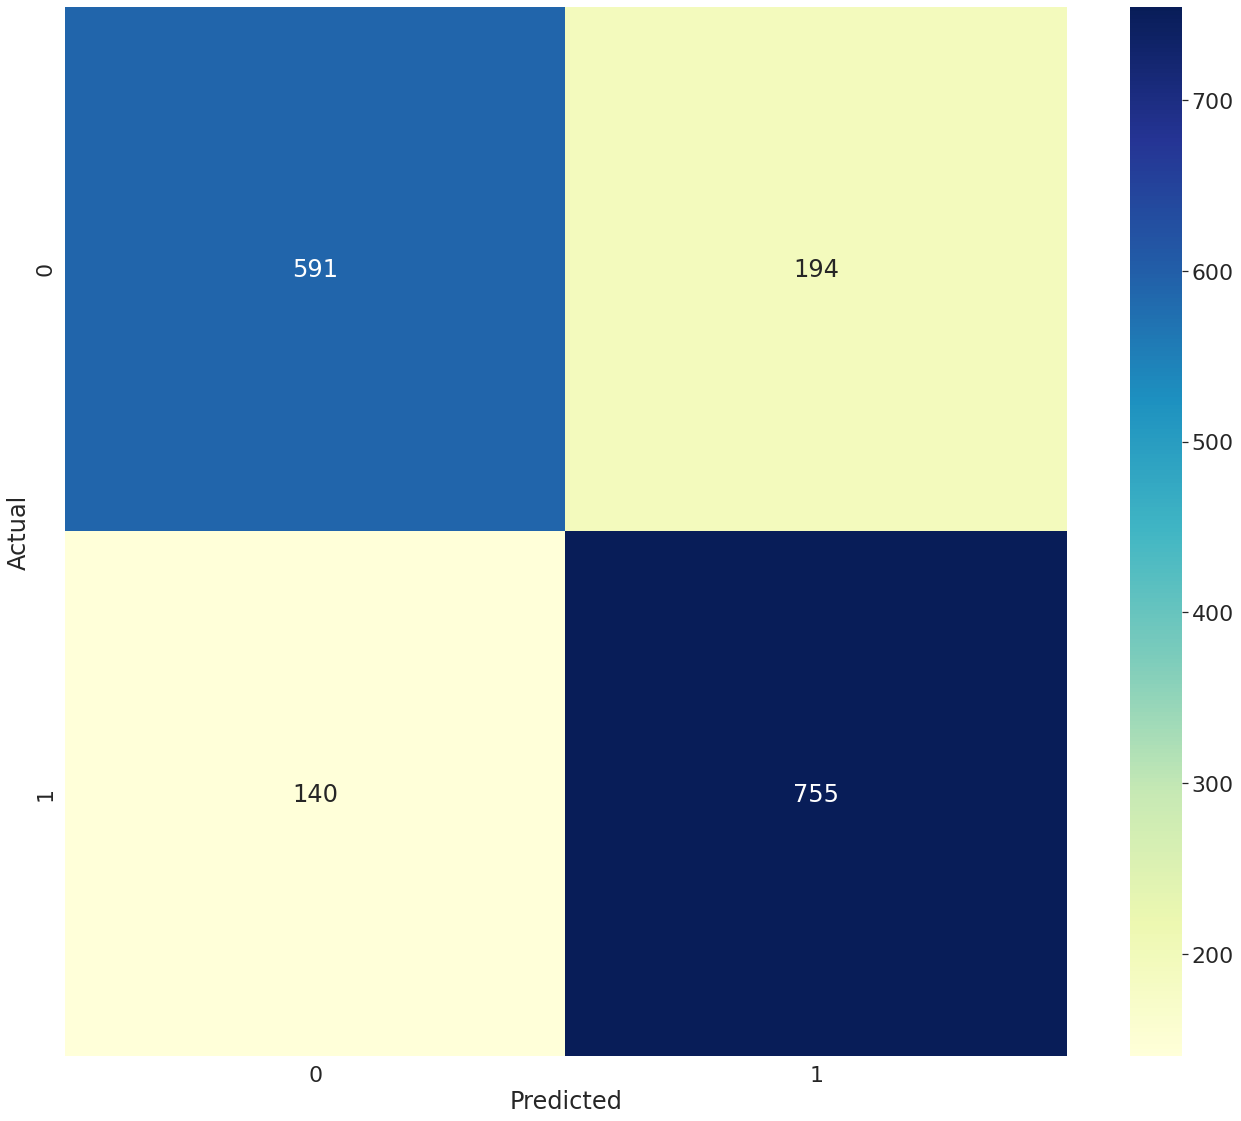

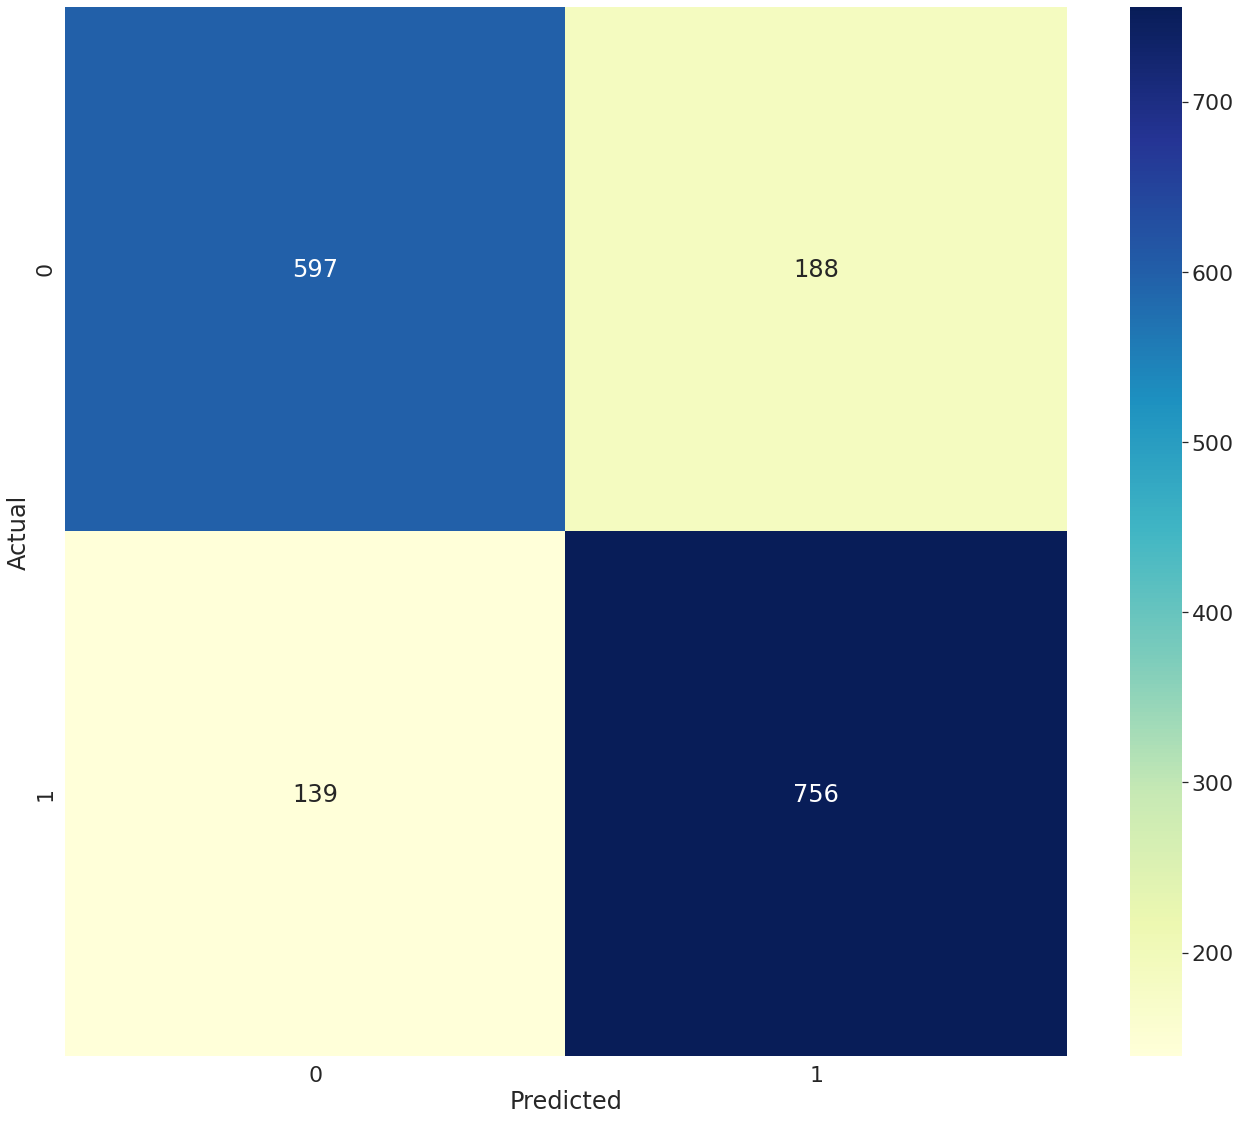

In [78]:
# Vamos a comparar un modelo base vs el mejor modelo de búsqueda aleatoria
# Modelo base: este modelo contiene 1000 arboles cada uno con un nivel de 100; usa el metodo de seleccion de bootstrap
# y el criterio gini
# base_model_clf1 = RandomForestClassifier(n_estimators=1000, criterion='gini',
#                                         max_features='auto', max_depth=100,
#                                         min_samples_split=5, min_samples_leaf=2,
#                                         bootstrap=True, random_state=15)
base_model_clf1 = RandomForestClassifier(random_state=15)

# Entrenar modelo base que usa 11f ahora con 3 nuevos parametros de max_features, min_samples_split, min_samples_leaf
base_model_clf1.fit(train_features, train_labelapp)

print('########################## MODELO DE CLASIFICACION: RANDOM FOREST BASE OPTIMIZADO ##########################')
print(base_model_clf1)
# Calculo de metricas: Exactitud, Precision, Sensibilidad, Valor F
y_pred_b, b_error, b_accuracy, b_precision, b_recall, b_f1 = evaluate(' Modelo Base RF', base_model_clf1,
                                                                      test_features,
                                                                      test_labelapp)
plot_confussion_matrix('rfc_11f', test_labelapp, y_pred_b)

print('############################ MODELO DE CLASIFICACION: RANDOM GRID SEARCH CON CV #############################')
# Mejor modelo de búsqueda aleatoria que usara los mejores hiperparametros obtenidos
best_random = clf_rf_random.best_estimator_
pprint(best_random)
# Calculo de metricas del modelo. Este modelo ya se entreno previamente.
y_pred_rd, rd_error, rd_accuracy, rd_precision, rd_recall, rd_f1 = evaluate(' Mejor modelo de Random Search con CV',
                                                                     best_random, test_features, test_labelapp)
plot_confussion_matrix('random-grid-search_rfc11f', test_labelapp, y_pred_rd)



In [79]:
print('\n')
print('Improvement (Error Rate) of {:0.2f}%.'.format(100 * (rd_error - b_error) / b_error))
print('Improvement (Accuracy) of {:0.2f}%.'.format(100 * (rd_accuracy - b_accuracy) / b_accuracy))
print('Improvement (Precision) of {:0.2f}%.'.format(100 * (rd_precision - b_precision) / b_precision))
print('Improvement (Recall) of {:0.2f}%.'.format(100 * (rd_recall - b_recall) / b_recall))
print('Improvement (F1 Score) of {:0.2f}%.'.format(100 * (rd_f1 - b_f1) / b_f1))




Improvement (Error Rate) of -2.10%.
Improvement (Accuracy) of 0.52%.
Improvement (Precision) of 0.66%.
Improvement (Recall) of 0.13%.
Improvement (F1 Score) of 0.40%.


In [80]:
print('################################## ELABORACION DE GRILLA DE BUSQUEDA CON CV ##################################')

# Crear grilla de parametros basado en los resultados de la búsqueda aleatoria
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 60, 80, 90],
    'max_features': ['log2'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [4, 6, 8],
    'criterion': ['gini'],
    'n_estimators': [100, 200, 400, 600, 800, 1000]
}

# Crear rango de arboles a evaluar
# trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 1000, 1400]}
# Modelo base de Bosque Aleatorio
clf_rfc = RandomForestClassifier(random_state=15)
# Instanciar modelo de grid search
grid_search = GridSearchCV(estimator=clf_rfc, param_grid=param_grid, cv=6,
                           n_jobs=4, verbose=10, scoring='neg_mean_absolute_error',
                           return_train_score=True)

# Ajustar la grilla de busqueda a los datos
grid_search.fit(train_features, train_labelapp)



################################## ELABORACION DE GRILLA DE BUSQUEDA CON CV ##################################
Fitting 6 folds for each of 216 candidates, totalling 1296 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   25.5s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   33.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   43.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   51.5s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   55.9s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  1.7min
[Parallel(

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=15), n_jobs=4,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [40, 60, 80, 90],
                         'max_features': ['log2'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [100, 200, 400, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=10)

In [81]:
# Mostrar resultados de Grid Search
grid_results = pd.DataFrame(grid_search.cv_results_)
print(grid_results)
# Mostrar resultados de Grid Search ordenados por el score promedio de prueba
print(grid_results.sort_values('mean_test_score', ascending=False).head(15))
# print(grid_results.sort_values('mean_test_score', ascending=False).head(15))

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.478504      0.042225         0.028783        0.004836   
1         0.976888      0.103886         0.058250        0.015898   
2         2.281325      0.168796         0.138964        0.014296   
3         3.407947      0.106471         0.181709        0.031203   
4         3.319742      0.345938         0.187826        0.005097   
..             ...           ...              ...             ...   
211       1.242985      0.059516         0.068896        0.002489   
212       2.461048      0.079222         0.135316        0.004744   
213       3.823310      0.176267         0.227537        0.048355   
214       5.015385      0.251102         0.286831        0.023348   
215       6.302276      0.442292         0.361483        0.013862   

    param_bootstrap param_criterion param_max_depth param_max_features  \
0              True            gini              40               log2   
1              True    

In [ ]:
print('################################ MODELO DE CLASIFICACION: GRID SEARCH CON CV ################################')

# Obtener mejor estimador de la grilla de busqueda
best_grid = grid_search.best_estimator_
print('Mejores hiperparámetros obtenidos con Grid Search:')
print(grid_search.best_params_)
print('Mejor estimador obtenido con Grid Search:')
print(grid_search.best_estimator_)

In [ ]:
y_pred_gs, grid_err, grid_acc, grid_prec, grid_recall, grid_f1, = evaluate('Mejor modelo de Grid Search con CV',
                                                                           best_grid, test_features, test_labelapp)
plot_confussion_matrix('grid-search_rfc11f', test_labelapp, y_pred_gs)

# Mostrar mejoras en metricas
print('\n')
print('Improvement (Error Rate) of {:0.2f}%.'.format(100 * (grid_err - b_error) / b_error))
print('Improvement (Accuracy) of {:0.2f}%.'.format(100 * (grid_acc - b_accuracy) / b_accuracy))
print('Improvement (Precision) of {:0.2f}%.'.format(100 * (grid_prec - b_precision) / b_precision))
print('Improvement (Recall) of {:0.2f}%.'.format(100 * (grid_recall - b_recall) / b_recall))
print('Improvement (F1 Score) of {:0.2f}%.'.format(100 * (grid_f1 - b_f1) / b_f1))

In [ ]:
# Mostrar mejoras en metricas
print('Improvement (Error Rate) of {:0.2f}%.'.format(100 * (grid_err - b_error) / b_error))
print('Improvement (Accuracy) of {:0.2f}%.'.format(100 * (grid_acc - b_accuracy) / b_accuracy))
print('Improvement (Precision) of {:0.2f}%.'.format(100 * (grid_prec - b_precision) / b_precision))
print('Improvement (Recall) of {:0.2f}%.'.format(100 * (grid_recall - b_recall) / b_recall))
print('Improvement (F1 Score) of {:0.2f}%.'.format(100 * (grid_f1 - b_f1) / b_f1))


In [ ]:
print('################################ MODELO DE CLASIFICACION 6: SOPORTE VECTORIAL ################################')
'''
pd.set_option('display.max_columns', None)

# paths to fill
feature_of_counts = "/home/lechu/Documents/GitHub/Prueba-de-concepto/seleccion_caracteristicas/processed_data" \
                        "/feature_vectors_counts.csv"

# Importando el dataset en forma de archivo .csv. El archivo se llama feature_vectors_counts.csv
# Tiene 12 colmumnas: 11 para mostrar la frecuencia de aparición de los 11 feature extraídos de la aplicacióny 1 para
# la varialbe target representada con el label o etiqueta que indica si la aplicación es malware o benigna.
dataset = pd.read_csv(feature_of_counts, index_col=0)

print('######################### MODELO DE CLASIFICACION 6: SVC USANDO 11 FEATURES ##########################')

# X: 11 tipos de atributo (variables independientes)
X = dataset.iloc[:, 1:12].values
# y: etiqueta de la aplicación (0: benigna, 1: malware) (variable target)
y = dataset.iloc[:, 12].values

# Separacion y estandarizacion de datos
train_features, test_features, train_labelapp, test_labelapp = separe_standarize_data(X, y)

# Modelo de clasificacion 6: Soporte Vectorial
clf_svc = SVC(C=1.0, kernel='rbf', gamma=0.73, max_iter=1000, random_state=15)
# Entrenamiento del modelo
clf_svc.fit(train_features, train_labelapp)
# Obtención de predicciones
y_pred = clf_svc.predict(test_features)

# Calcular metricas de Accuracy, Error Rate, Precision, Recall, F1 Score
error_rate_svc, accuracy_svc, precision_svc, recall_svc = obtain_metrics(test_labelapp, y_pred)
# Graficar la matriz de confusion
plot_confussion_matrix('svc', test_labelapp, y_pred)
'''

In [ ]:
'############################ Comparacion de resultados entre 8 modelos de Bosque Aleatorio ###########################'
# Los modelos son:
# (1)Modelo RF usando 5 features con mejor puntuación y como único parámetro a random_state
# (2)Modelo RF usando 6 features con mejor puntuación y como único parámetro a random_state
# (3)Modelo RF usando los 11 features y como único parámetro a random_state
# (4)Modelo SVM usando 5 features con mejor puntuación y único parámetro random_statte
# (5)Modelo SVM usando 6 features con mejor puntuación y como único parámetro a random_state
# (6)Modelo SVM usando los 11 features y como único parámetro a random_state
# (7)Modelo RF obtenido con Random Grid Search con CV usando los 11 features y los parametros tuneados de
# (n_estimators, criterion, max_features, max_depth, min_samples_split, min_samples_leaf, bootstrap, random_state)
# (8)Modelo RF obtenido con Grid Search con CV usando los 11 features y habiendo tuneado los anteriores 7 parámetros.
# Las tecncias de los modelos (6) y (7) usaron Validacion Cruzada (CV - Cross Validation).

# Se compararan las metricas de Ratio de Error, Exactitud, Precision.
# (i) Comparacion del Ratio de error

plt.style.use('fivethirtyeight')
figsize(12, 14)
# Dataframe para agrupar resultados
error_comparison = pd.DataFrame({'model': ['5f RF Model', '6f RF Model', '11f RF Model',
                                           '5f SVC Model', '6f SVC Model', '11f SVC Model',
                                           'Random Grid Search Model', 'Grid Search Model'],
                                 'error_rate': [error_rate_rfc5f, error_rate_rfc6f, error_rate_rfc11f,
                                                error_rate_svc5f, error_rate_svc6f, error_rate_svc11f,
                                                rd_error, grid_err]})
# Barra horizontal del grafico sobre evaluacion del ratio de error
error_comparison.sort_values('error_rate', ascending=False).plot(x='model', y='error_rate', kind='barh',
                                                                 color='blue', edgecolor='black')
# Ajustes de grafico
plt.ylabel('')
plt.yticks(size=12, fontsize='x-large' )
plt.xlabel('Error Rate', fontsize='xx-large')
plt.xticks(size=12, fontsize='x-large' )
plt.title('Model Comparison on Test Error Rate', size=24)
plt.savefig('../code/plots/plot-comparacion-ratioerror.png')
plt.show()


In [ ]:
# (ii) Comparacion de la Exactitud
plt.style.use('fivethirtyeight')
figsize(12, 14)
# Dataframe para agrupar resultados
accuracy_comparison = pd.DataFrame({'model': ['5f RF Model', '6f RF Model', '11f RF Model',
                                              '5f SVC Model', '6f SVC Model', '11f SVC Model',
                                              'Random Grid Search Model', 'Grid Search Model'],
                                    'accuracy': [accuracy_rfc5f, accuracy_rfc6f, accuracy_rfc11f,
                                                 accuracy_svc5f, accuracy_svc6f, accuracy_svc11f,
                                                 rd_accuracy, grid_acc]})

# Barra horizontal del grafico sobre evaluacion de la exactitud
accuracy_comparison.sort_values('accuracy', ascending=False).plot(x='model', y='accuracy', kind='barh',
                                                                  color='blue', edgecolor='black')
# Ajustes de grafico
plt.ylabel('')
plt.yticks(size=12, fontsize='x-large' )
plt.xlabel('Accuracy', fontsize='xx-large')
plt.xticks(size=12, fontsize='x-large' )
plt.title('Model Comparison on Test Accuracy', size=24)
plt.savefig('../code/plots/plot-comparacion-exactitud.png')
plt.show()

In [ ]:
# (iii) Comparacion de la Sensibilidad
plt.style.use('fivethirtyeight')
figsize(12, 14)
# Dataframe para agrupar resultados
accuracy_comparison = pd.DataFrame({'model': ['5f RF Model', '6f RF Model', '11f RF Model',
                                              '5f SVC Model', '6f SVC Model', '11f SVC Model',
                                              'Random Grid Search Model', 'Grid Search Model'],
                                    'recall': [recall_rfc5f, recall_rfc6f, recall_rfc11f,
                                               recall_svc5f, recall_svc6f, recall_svc11f,
                                               rd_recall, grid_recall]})

# Barra horizontal del grafico sobre evaluacion de la sensibilidad
accuracy_comparison.sort_values('recall', ascending=False).plot(x='model', y='recall', kind='barh',
                                                                color='blue', edgecolor='black')
# Ajustes de grafico
plt.ylabel('')
plt.yticks(size=12, fontsize='x-large' )
plt.xlabel('Recall', fontsize='xx-large')
plt.xticks(size=12, fontsize='x-large' )
plt.title('Model Comparison on Test Recall', size=24)
plt.savefig('../code/plots/plot-comparacion-sensibilidad.png')
plt.show()

In [ ]:
'########################## Grafico del error de entrenamiento y test vs el número de árboles #########################'
plot_results(clf_rf_random)
plot_results(grid_search)


In [ ]:
'################# Grafico Dist. valores reales y los valores pronosticados en el conjunto de pruebas #################'
figsize(20, 22)
# Grafico de densitdad de las predicciones y valores reales
sns.kdeplot(y_pred_gs, label='Predictions')
sns.kdeplot(test_labelapp, label='Actual Values')

# Asignando etiquetas a partes del grafico
plt.xlabel('Classification Score', fontsize='xx-large')
plt.xticks(size=12, fontsize='x-large' )
plt.ylabel('Density', fontsize='xx-large')
plt.yticks(size=12, fontsize='x-large' )
plt.title('Test Values and Predictions', size=24)
plt.savefig('../code/plots/plot-dist-actual-predicted-values.png')
plt.show()

In [ ]:
'########################################### Curva ROC de modelos generados ###########################################'
fig,ax= plt.subplots()
plot.roc(test_labelapp, y_pred_svc5f, ax=ax)
plot.roc(test_labelapp, y_pred_5f, ax=ax)
plot.roc(test_labelapp, y_test_pred_svc11f, ax=ax)
plot.roc(test_labelapp, y_test_predicted_rfc11f, ax=ax)
plot.roc(test_labelapp, y_pred_gs, ax=ax)
plot.roc(test_labelapp, y_pred_rd, ax=ax)

ax.legend(['SVM 5f Model', 'RF 5f Model', 'SVM 11f Model', 'RF 11f Model', 'RF Grid Search Model', 'RF Random Grid Search Model'], fontsize='small')
fig.savefig('../code/plots/Curva-ROC.png')
plt.show()
fig


